<a href="https://colab.research.google.com/github/venti-sei/Bet26/blob/main/bet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Libraries

In [87]:
# !pip install

# Import Libraries

In [88]:
import os, io, requests
import pandas as pd

In [89]:
# Import Dataset

In [90]:
seasons = {
  "2020-21": "2021",
  "2021-22": "2122",
  "2022-23": "2223",
  "2023-24": "2324",
  "2024-25": "2425",
}

base = "https://www.football-data.co.uk/mmz4281/{}/E0.csv"
out_dir = "premier_league_2020_2025"
os.makedirs(out_dir, exist_ok=True)

frames = []
for label, code in seasons.items():
  url = base.format(code)
  try:
      r = requests.get(url, timeout=30)
      r.raise_for_status()
      df = pd.read_csv(io.BytesIO(r.content))
      df["Season"] = label
      frames.append(df)
      df.to_csv(os.path.join(out_dir, f"E0_{label}.csv"), index=False)
      print(f"✓ downloaded {label}")
  except requests.HTTPError as e:
      print(f"✗ {label} missing ({e}). Skipping.")

# combined file (only for seasons that downloaded)
if frames:
  all_df = pd.concat(frames, ignore_index=True)
  all_df.to_csv(os.path.join(out_dir, "E0_2020_2025_combined.csv"), index=False)
  print(f"Combined shape: {all_df.shape}")

✓ downloaded 2020-21
✓ downloaded 2021-22
✓ downloaded 2022-23
✓ downloaded 2023-24
✓ downloaded 2024-25
Combined shape: (1900, 133)


In [91]:
"""
Date = Match Date (dd/mm/yy)
Time = Time of match kick off
HomeTeam = Home Team
AwayTeam = Away Team
FTHG and HG = Full Time Home Team Goals
FTAG and AG = Full Time Away Team Goals
FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)
HTHG = Half Time Home Team Goals
HTAG = Half Time Away Team Goals
HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)

Match Statistics (where available)
Attendance = Crowd Attendance
Referee = Match Referee
HS = Home Team Shots
AS = Away Team Shots
HST = Home Team Shots on Target
AST = Away Team Shots on Target
HHW = Home Team Hit Woodwork
AHW = Away Team Hit Woodwork
HC = Home Team Corners
AC = Away Team Corners
HF = Home Team Fouls Committed
AF = Away Team Fouls Committed
HFKC = Home Team Free Kicks Conceded
AFKC = Away Team Free Kicks Conceded
HO = Home Team Offsides
AO = Away Team Offsides
HY = Home Team Yellow Cards
AY = Away Team Yellow Cards
HR = Home Team Red Cards
AR = Away Team Red Cards
HBP = Home Team Bookings Points (10 = yellow, 25 = red)
ABP = Away Team Bookings Points (10 = yellow, 25 = red)
"""

'\nDate = Match Date (dd/mm/yy)\nTime = Time of match kick off\nHomeTeam = Home Team\nAwayTeam = Away Team\nFTHG and HG = Full Time Home Team Goals\nFTAG and AG = Full Time Away Team Goals\nFTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)\nHTHG = Half Time Home Team Goals\nHTAG = Half Time Away Team Goals\nHTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)\n\nMatch Statistics (where available)\nAttendance = Crowd Attendance\nReferee = Match Referee\nHS = Home Team Shots\nAS = Away Team Shots\nHST = Home Team Shots on Target\nAST = Away Team Shots on Target\nHHW = Home Team Hit Woodwork\nAHW = Away Team Hit Woodwork\nHC = Home Team Corners\nAC = Away Team Corners\nHF = Home Team Fouls Committed\nAF = Away Team Fouls Committed\nHFKC = Home Team Free Kicks Conceded\nAFKC = Away Team Free Kicks Conceded\nHO = Home Team Offsides\nAO = Away Team Offsides\nHY = Home Team Yellow Cards\nAY = Away Team Yellow Cards\nHR = Home Team Red Cards\nAR = Away Team Red Cards\nHBP = Ho

In [92]:
display(all_df.head(1))

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,1XBCH,1XBCD,1XBCA,BFECH,BFECD,BFECA,BFEC>2.5,BFEC<2.5,BFECAHH,BFECAHA
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
relevant_columns = [ 'Date', 'Time', 'HomeTeam', 'AwayTeam',
                    'FTHG',	'FTAG',	'HTHG',	'HTAG',	'HTR',	'Referee',	'HS',	'AS',	'HST',	'AST',	'HF',	'AF',	'HC',	'AC',	'HY',	'AY',	'HR',	'AR' ,'FTR']

# Filter the DataFrame to keep only the relevant columns
filtered_df = all_df[relevant_columns]
display(filtered_df.head())

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,FTR
0,12/09/2020,12:30,Fulham,Arsenal,0,3,0,1,A,C Kavanagh,...,6,12,12,2,3,2,2,0,0,A
1,12/09/2020,15:00,Crystal Palace,Southampton,1,0,1,0,H,J Moss,...,5,14,11,7,3,2,1,0,0,H
2,12/09/2020,17:30,Liverpool,Leeds,4,3,3,2,H,M Oliver,...,3,9,6,9,0,1,0,0,0,H
3,12/09/2020,20:00,West Ham,Newcastle,0,2,0,0,D,S Attwell,...,2,13,7,8,7,2,2,0,0,A
4,13/09/2020,14:00,West Brom,Leicester,0,3,0,0,D,A Taylor,...,7,12,9,2,5,1,1,0,0,A


In [94]:
filtered_df['MatchDateTime'] = pd.to_datetime(filtered_df['Date'] + ' ' + filtered_df['Time'], format='%d/%m/%Y %H:%M')
filtered_df = filtered_df.sort_values(by='MatchDateTime').reset_index(drop=True)
filtered_df['MatchOrder'] = filtered_df.index + 1

display(filtered_df.head())

/tmp/ipython-input-1528726994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['MatchDateTime'] = pd.to_datetime(filtered_df['Date'] + ' ' + filtered_df['Time'], format='%d/%m/%Y %H:%M')


,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,...,AF,HC,AC,HY,AY,HR,AR,FTR,MatchDateTime,MatchOrder
0,12/09/2020,12:30,Fulham,Arsenal,0,3,0,1,A,C Kavanagh,...,12,2,3,2,2,0,0,A,2020-09-12 12:30:00,1
1,12/09/2020,15:00,Crystal Palace,Southampton,1,0,1,0,H,J Moss,...,11,7,3,2,1,0,0,H,2020-09-12 15:00:00,2
2,12/09/2020,17:30,Liverpool,Leeds,4,3,3,2,H,M Oliver,...,6,9,0,1,0,0,0,H,2020-09-12 17:30:00,3
3,12/09/2020,20:00,West Ham,Newcastle,0,2,0,0,D,S Attwell,...,7,8,7,2,2,0,0,A,2020-09-12 20:00:00,4
4,13/09/2020,14:00,West Brom,Leicester,0,3,0,0,D,A Taylor,...,9,2,5,1,1,0,0,A,2020-09-13 14:00:00,5


In [95]:
filtered_df.head(10)

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,...,AF,HC,AC,HY,AY,HR,AR,FTR,MatchDateTime,MatchOrder
0,12/09/2020,12:30,Fulham,Arsenal,0,3,0,1,A,C Kavanagh,...,12,2,3,2,2,0,0,A,2020-09-12 12:30:00,1
1,12/09/2020,15:00,Crystal Palace,Southampton,1,0,1,0,H,J Moss,...,11,7,3,2,1,0,0,H,2020-09-12 15:00:00,2
2,12/09/2020,17:30,Liverpool,Leeds,4,3,3,2,H,M Oliver,...,6,9,0,1,0,0,0,H,2020-09-12 17:30:00,3
3,12/09/2020,20:00,West Ham,Newcastle,0,2,0,0,D,S Attwell,...,7,8,7,2,2,0,0,A,2020-09-12 20:00:00,4
4,13/09/2020,14:00,West Brom,Leicester,0,3,0,0,D,A Taylor,...,9,2,5,1,1,0,0,A,2020-09-13 14:00:00,5
5,13/09/2020,16:30,Tottenham,Everton,0,1,0,0,D,M Atkinson,...,7,5,3,1,0,0,0,A,2020-09-13 16:30:00,6
6,14/09/2020,18:00,Sheffield United,Wolves,0,2,0,2,A,M Dean,...,7,12,5,2,1,0,0,A,2020-09-14 18:00:00,7
7,14/09/2020,20:15,Brighton,Chelsea,1,3,0,1,A,C Pawson,...,13,4,3,1,0,0,0,A,2020-09-14 20:15:00,8
8,19/09/2020,12:30,Everton,West Brom,5,2,2,1,H,M Dean,...,11,11,1,1,0,0,1,H,2020-09-19 12:30:00,9
9,19/09/2020,15:00,Leeds,Fulham,4,3,2,1,H,A Taylor,...,18,5,3,1,2,0,0,H,2020-09-19 15:00:00,10


In [96]:
filtered_df.tail(10)

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,...,AF,HC,AC,HY,AY,HR,AR,FTR,MatchDateTime,MatchOrder
1890,25/05/2025,16:00,Nott'm Forest,Chelsea,0,1,0,0,D,A Taylor,...,11,7,4,2,2,0,0,A,2025-05-25 16:00:00,1891
1891,25/05/2025,16:00,Newcastle,Everton,0,1,0,0,D,T Harrington,...,9,12,3,1,4,0,0,A,2025-05-25 16:00:00,1892
1892,25/05/2025,16:00,Southampton,Arsenal,1,2,0,1,A,D Bond,...,8,5,8,0,0,0,0,A,2025-05-25 16:00:00,1893
1893,25/05/2025,16:00,Man United,Aston Villa,2,0,0,0,D,T Bramall,...,10,4,3,2,2,0,1,H,2025-05-25 16:00:00,1894
1894,25/05/2025,16:00,Tottenham,Brighton,1,4,1,0,H,R Jones,...,8,2,11,3,1,0,0,A,2025-05-25 16:00:00,1895
1895,25/05/2025,16:00,Ipswich,West Ham,1,3,0,1,A,T Robinson,...,9,4,0,1,1,0,0,A,2025-05-25 16:00:00,1896
1896,25/05/2025,16:00,Fulham,Man City,0,2,0,1,A,A Madley,...,5,1,6,0,0,0,0,A,2025-05-25 16:00:00,1897
1897,25/05/2025,16:00,Bournemouth,Leicester,2,0,0,0,D,L Smith,...,16,6,1,0,2,0,0,H,2025-05-25 16:00:00,1898
1898,25/05/2025,16:00,Liverpool,Crystal Palace,1,1,0,1,A,D England,...,10,11,0,1,0,1,0,D,2025-05-25 16:00:00,1899
1899,25/05/2025,16:00,Wolves,Brentford,1,1,0,1,A,C Pawson,...,9,8,3,2,1,0,0,D,2025-05-25 16:00:00,1900


In [97]:
filtered_df = filtered_df.drop(columns=['Date', 'Time', 'MatchDateTime'])
display(filtered_df.head())

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,...,HF,AF,HC,AC,HY,AY,HR,AR,FTR,MatchOrder
0,Fulham,Arsenal,0,3,0,1,A,C Kavanagh,5,13,...,12,12,2,3,2,2,0,0,A,1
1,Crystal Palace,Southampton,1,0,1,0,H,J Moss,5,9,...,14,11,7,3,2,1,0,0,H,2
2,Liverpool,Leeds,4,3,3,2,H,M Oliver,22,6,...,9,6,9,0,1,0,0,0,H,3
3,West Ham,Newcastle,0,2,0,0,D,S Attwell,15,15,...,13,7,8,7,2,2,0,0,A,4
4,West Brom,Leicester,0,3,0,0,D,A Taylor,7,13,...,12,9,2,5,1,1,0,0,A,5


# Check Nonvalues

In [98]:
display(filtered_df.isnull().sum())

,0
HomeTeam,0
AwayTeam,0
FTHG,0
FTAG,0
HTHG,0
HTAG,0
HTR,0
Referee,0
HS,0
AS,0


In [99]:
import numpy as np

conditions = [
    filtered_df['FTR'] == 'H',
    filtered_df['FTR'] == 'D'
]

choices = [3, 1]

filtered_df['HP'] = np.select(conditions, choices, default=0)

display(filtered_df.head())

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,...,AF,HC,AC,HY,AY,HR,AR,FTR,MatchOrder,HP
0,Fulham,Arsenal,0,3,0,1,A,C Kavanagh,5,13,...,12,2,3,2,2,0,0,A,1,0
1,Crystal Palace,Southampton,1,0,1,0,H,J Moss,5,9,...,11,7,3,2,1,0,0,H,2,3
2,Liverpool,Leeds,4,3,3,2,H,M Oliver,22,6,...,6,9,0,1,0,0,0,H,3,3
3,West Ham,Newcastle,0,2,0,0,D,S Attwell,15,15,...,7,8,7,2,2,0,0,A,4,0
4,West Brom,Leicester,0,3,0,0,D,A Taylor,7,13,...,9,2,5,1,1,0,0,A,5,0


In [100]:
conditions_ap = [
    filtered_df['FTR'] == 'A',
    filtered_df['FTR'] == 'D'
]

choices_ap = [3, 1]

filtered_df['AP'] = np.select(conditions_ap, choices_ap, default=0)

display(filtered_df.head())

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,...,HC,AC,HY,AY,HR,AR,FTR,MatchOrder,HP,AP
0,Fulham,Arsenal,0,3,0,1,A,C Kavanagh,5,13,...,2,3,2,2,0,0,A,1,0,3
1,Crystal Palace,Southampton,1,0,1,0,H,J Moss,5,9,...,7,3,2,1,0,0,H,2,3,0
2,Liverpool,Leeds,4,3,3,2,H,M Oliver,22,6,...,9,0,1,0,0,0,H,3,3,0
3,West Ham,Newcastle,0,2,0,0,D,S Attwell,15,15,...,8,7,2,2,0,0,A,4,0,3
4,West Brom,Leicester,0,3,0,0,D,A Taylor,7,13,...,2,5,1,1,0,0,A,5,0,3


In [101]:
display(filtered_df.head())

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,...,HC,AC,HY,AY,HR,AR,FTR,MatchOrder,HP,AP
0,Fulham,Arsenal,0,3,0,1,A,C Kavanagh,5,13,...,2,3,2,2,0,0,A,1,0,3
1,Crystal Palace,Southampton,1,0,1,0,H,J Moss,5,9,...,7,3,2,1,0,0,H,2,3,0
2,Liverpool,Leeds,4,3,3,2,H,M Oliver,22,6,...,9,0,1,0,0,0,H,3,3,0
3,West Ham,Newcastle,0,2,0,0,D,S Attwell,15,15,...,8,7,2,2,0,0,A,4,0,3
4,West Brom,Leicester,0,3,0,0,D,A Taylor,7,13,...,2,5,1,1,0,0,A,5,0,3


# Feature Collection

## Add HRP and ARP

In [102]:
home_matches = filtered_df[['HomeTeam', 'AwayTeam', 'HP', 'MatchOrder']].copy()
home_matches.rename(columns={'HomeTeam': 'Team', 'AwayTeam': 'Opponent', 'HP': 'Points'}, inplace=True)

away_matches = filtered_df[['AwayTeam', 'HomeTeam', 'AP', 'MatchOrder']].copy()
away_matches.rename(columns={'AwayTeam': 'Team', 'HomeTeam': 'Opponent', 'AP': 'Points'}, inplace=True)

combined_match_data = pd.concat([home_matches, away_matches], ignore_index=True)
combined_match_data = combined_match_data.sort_values(by='MatchOrder').reset_index(drop=True)

display(combined_match_data.head())

,Team,Opponent,Points,MatchOrder
0,Fulham,Arsenal,0,1
1,Arsenal,Fulham,3,1
2,Crystal Palace,Southampton,3,2
3,Southampton,Crystal Palace,0,2
4,Liverpool,Leeds,3,3


In [103]:
combined_match_data['RollingPoints'] = combined_match_data.groupby('Team')['Points'].transform(lambda x: x.rolling(window=10, min_periods=1).sum().shift(1))
display(combined_match_data.head(20))

,Team,Opponent,Points,MatchOrder,RollingPoints
0,Fulham,Arsenal,0,1,NaN
1,Arsenal,Fulham,3,1,NaN
2,Crystal Palace,Southampton,3,2,NaN
3,Southampton,Crystal Palace,0,2,NaN
4,Liverpool,Leeds,3,3,NaN
5,Leeds,Liverpool,0,3,NaN
6,Newcastle,West Ham,3,4,NaN
7,West Ham,Newcastle,0,4,NaN
8,Leicester,West Brom,3,5,NaN
9,West Brom,Leicester,0,5,NaN


In [104]:
home_rolling_points = combined_match_data[combined_match_data['Team'] == combined_match_data['Opponent']].drop(columns=['Opponent'])
filtered_df = pd.merge(filtered_df, combined_match_data[['Team', 'MatchOrder', 'RollingPoints']], left_on=['HomeTeam', 'MatchOrder'], right_on=['Team', 'MatchOrder'], how='left')
filtered_df.rename(columns={'RollingPoints': 'HRP'}, inplace=True)
filtered_df.drop(columns=['Team'], inplace=True)

filtered_df = pd.merge(filtered_df, combined_match_data[['Team', 'MatchOrder', 'RollingPoints']], left_on=['AwayTeam', 'MatchOrder'], right_on=['Team', 'MatchOrder'], how='left')
filtered_df.rename(columns={'RollingPoints': 'ARP'}, inplace=True)
filtered_df.drop(columns=['Team'], inplace=True)

display(filtered_df.tail(10))

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,...,HY,AY,HR,AR,FTR,MatchOrder,HP,AP,HRP,ARP
1890,Nott'm Forest,Chelsea,0,1,0,0,D,A Taylor,10,6,...,2,2,0,0,A,1891,0,3,17.0,20.0
1891,Newcastle,Everton,0,1,0,0,D,T Harrington,17,14,...,1,4,0,0,A,1892,0,3,22.0,13.0
1892,Southampton,Arsenal,1,2,0,1,A,D Bond,7,23,...,0,0,0,0,A,1893,0,3,3.0,17.0
1893,Man United,Aston Villa,2,0,0,0,D,T Bramall,25,6,...,2,2,0,1,H,1894,3,0,6.0,24.0
1894,Tottenham,Brighton,1,4,1,0,H,R Jones,4,23,...,3,1,0,0,A,1895,0,3,5.0,15.0
1895,Ipswich,West Ham,1,3,0,1,A,T Robinson,14,10,...,1,1,0,0,A,1896,0,3,5.0,7.0
1896,Fulham,Man City,0,2,0,1,A,A Madley,13,20,...,0,0,0,0,A,1897,0,3,12.0,21.0
1897,Bournemouth,Leicester,2,0,0,0,D,L Smith,20,3,...,0,2,0,0,H,1898,3,0,10.0,8.0
1898,Liverpool,Crystal Palace,1,1,0,1,A,D England,14,8,...,1,0,1,0,D,1899,1,1,19.0,16.0
1899,Wolves,Brentford,1,1,0,1,A,C Pawson,18,13,...,2,1,0,0,D,1900,1,1,19.0,17.0


## Last 5 Home and Away Points

In [105]:
home_matches_temp = filtered_df[['HomeTeam', 'MatchOrder', 'HP']].copy()
home_matches_temp['HL5HP'] = home_matches_temp.groupby('HomeTeam')['HP'].transform(lambda x: x.rolling(window=5, min_periods=1).sum().shift(1))

filtered_df = pd.merge(filtered_df, home_matches_temp[['HomeTeam', 'MatchOrder', 'HL5HP']], on=['HomeTeam', 'MatchOrder'], how='left')

display(filtered_df.head())

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,...,AY,HR,AR,FTR,MatchOrder,HP,AP,HRP,ARP,HL5HP
0,Fulham,Arsenal,0,3,0,1,A,C Kavanagh,5,13,...,2,0,0,A,1,0,3,NaN,NaN,NaN
1,Crystal Palace,Southampton,1,0,1,0,H,J Moss,5,9,...,1,0,0,H,2,3,0,NaN,NaN,NaN
2,Liverpool,Leeds,4,3,3,2,H,M Oliver,22,6,...,0,0,0,H,3,3,0,NaN,NaN,NaN
3,West Ham,Newcastle,0,2,0,0,D,S Attwell,15,15,...,2,0,0,A,4,0,3,NaN,NaN,NaN
4,West Brom,Leicester,0,3,0,0,D,A Taylor,7,13,...,1,0,0,A,5,0,3,NaN,NaN,NaN


In [106]:
away_matches_temp = filtered_df[['AwayTeam', 'MatchOrder', 'AP']].copy()
away_matches_temp['AL5AP'] = away_matches_temp.groupby('AwayTeam')['AP'].transform(lambda x: x.rolling(window=5, min_periods=1).sum().shift(1))

filtered_df = pd.merge(filtered_df, away_matches_temp[['AwayTeam', 'MatchOrder', 'AL5AP']], on=['AwayTeam', 'MatchOrder'], how='left')

display(filtered_df.head())

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,...,HR,AR,FTR,MatchOrder,HP,AP,HRP,ARP,HL5HP,AL5AP
0,Fulham,Arsenal,0,3,0,1,A,C Kavanagh,5,13,...,0,0,A,1,0,3,NaN,NaN,NaN,NaN
1,Crystal Palace,Southampton,1,0,1,0,H,J Moss,5,9,...,0,0,H,2,3,0,NaN,NaN,NaN,NaN
2,Liverpool,Leeds,4,3,3,2,H,M Oliver,22,6,...,0,0,H,3,3,0,NaN,NaN,NaN,NaN
3,West Ham,Newcastle,0,2,0,0,D,S Attwell,15,15,...,0,0,A,4,0,3,NaN,NaN,NaN,NaN
4,West Brom,Leicester,0,3,0,0,D,A Taylor,7,13,...,0,0,A,5,0,3,NaN,NaN,NaN,NaN


In [107]:
pd.set_option('display.max_rows', None)
display(filtered_df.head(100))

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,...,HR,AR,FTR,MatchOrder,HP,AP,HRP,ARP,HL5HP,AL5AP
0,Fulham,Arsenal,0,3,0,1,A,C Kavanagh,5,13,...,0,0,A,1,0,3,NaN,NaN,NaN,NaN
1,Crystal Palace,Southampton,1,0,1,0,H,J Moss,5,9,...,0,0,H,2,3,0,NaN,NaN,NaN,NaN
2,Liverpool,Leeds,4,3,3,2,H,M Oliver,22,6,...,0,0,H,3,3,0,NaN,NaN,NaN,NaN
3,West Ham,Newcastle,0,2,0,0,D,S Attwell,15,15,...,0,0,A,4,0,3,NaN,NaN,NaN,NaN
4,West Brom,Leicester,0,3,0,0,D,A Taylor,7,13,...,0,0,A,5,0,3,NaN,NaN,NaN,NaN
5,Tottenham,Everton,0,1,0,0,D,M Atkinson,9,15,...,0,0,A,6,0,3,NaN,NaN,NaN,NaN
6,Sheffield United,Wolves,0,2,0,2,A,M Dean,9,11,...,0,0,A,7,0,3,NaN,NaN,NaN,NaN
7,Brighton,Chelsea,1,3,0,1,A,C Pawson,13,10,...,0,0,A,8,0,3,NaN,NaN,NaN,NaN
8,Everton,West Brom,5,2,2,1,H,M Dean,17,6,...,0,1,H,9,3,0,3.0,0.0,NaN,NaN
9,Leeds,Fulham,4,3,2,1,H,A Taylor,10,14,...,0,0,H,10,3,0,0.0,0.0,NaN,NaN


## Correlation Heatmap

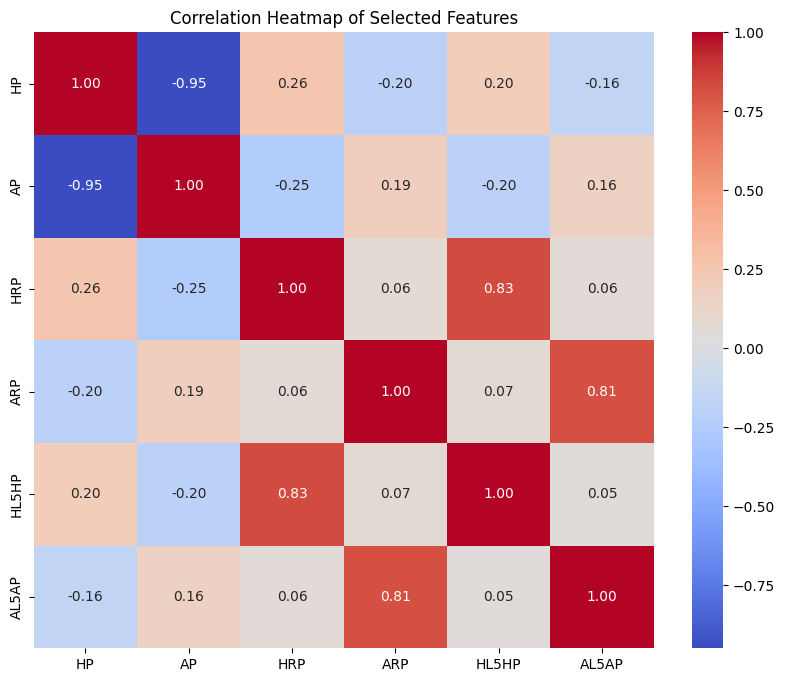

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns for the correlation heatmap
correlation_features = ['HP', 'AP', 'HRP', 'ARP', 'HL5HP', 'AL5AP']

# Calculate the correlation matrix
correlation_matrix = filtered_df[correlation_features].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Features')
plt.show()

## Two last head to head matches

In [109]:
def get_h2h_home_team_points(row, df):
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    match_order = row['MatchOrder']

    # Filter past head-to-head matches
    past_h2h_matches = df[
        (df['MatchOrder'] < match_order) &
        (
            ((df['HomeTeam'] == home_team) & (df['AwayTeam'] == away_team)) |
            ((df['HomeTeam'] == away_team) & (df['AwayTeam'] == home_team))
        )
    ].sort_values(by='MatchOrder', ascending=False)

    h2h_points_list = []
    for _, h2h_row in past_h2h_matches.head(2).iterrows():
        if h2h_row['HomeTeam'] == home_team:
            h2h_points_list.append(h2h_row['HP'])
        else:
            h2h_points_list.append(h2h_row['AP'])

    # Pad with 0s if fewer than 2 matches found
    while len(h2h_points_list) < 2:
        h2h_points_list.append(0)

    return pd.Series(h2h_points_list, index=['H2H_Home_Pts_1', 'H2H_Home_Pts_2'])

# Create a temporary DataFrame to store the individual H2H home points
h2h_home_data = filtered_df.apply(lambda row: get_h2h_home_team_points(row, filtered_df), axis=1)
h2h_home_data['MatchOrder'] = filtered_df['MatchOrder']
h2h_home_data['HomeTeam'] = filtered_df['HomeTeam']

# Calculate the sum of the last two H2H home points in the temporary DataFrame
h2h_home_data['H2H_Home_Sum_Last2Pts'] = h2h_home_data['H2H_Home_Pts_1'] + h2h_home_data['H2H_Home_Pts_2']

# Merge only the sum back to filtered_df
filtered_df = pd.merge(
    filtered_df,
    h2h_home_data[['MatchOrder', 'HomeTeam', 'H2H_Home_Sum_Last2Pts']],
    on=['MatchOrder', 'HomeTeam'],
    how='left'
)

display(filtered_df.head())

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,...,AR,FTR,MatchOrder,HP,AP,HRP,ARP,HL5HP,AL5AP,H2H_Home_Sum_Last2Pts
0,Fulham,Arsenal,0,3,0,1,A,C Kavanagh,5,13,...,0,A,1,0,3,NaN,NaN,NaN,NaN,0
1,Crystal Palace,Southampton,1,0,1,0,H,J Moss,5,9,...,0,H,2,3,0,NaN,NaN,NaN,NaN,0
2,Liverpool,Leeds,4,3,3,2,H,M Oliver,22,6,...,0,H,3,3,0,NaN,NaN,NaN,NaN,0
3,West Ham,Newcastle,0,2,0,0,D,S Attwell,15,15,...,0,A,4,0,3,NaN,NaN,NaN,NaN,0
4,West Brom,Leicester,0,3,0,0,D,A Taylor,7,13,...,0,A,5,0,3,NaN,NaN,NaN,NaN,0


In [110]:
def get_h2h_away_team_points(row, df):
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    match_order = row['MatchOrder']

    # Filter past head-to-head matches
    past_h2h_matches = df[
        (df['MatchOrder'] < match_order) &
        (
            ((df['HomeTeam'] == home_team) & (df['AwayTeam'] == away_team)) |
            ((df['HomeTeam'] == away_team) & (df['AwayTeam'] == home_team))
        )
    ].sort_values(by='MatchOrder', ascending=False)

    h2h_points_list = []
    for _, h2h_row in past_h2h_matches.head(2).iterrows():
        if h2h_row['AwayTeam'] == away_team:
            h2h_points_list.append(h2h_row['AP'])
        else:
            h2h_points_list.append(h2h_row['HP'])

    # Pad with 0s if fewer than 2 matches found
    while len(h2h_points_list) < 2:
        h2h_points_list.append(0)

    return pd.Series(h2h_points_list, index=['H2H_Away_Pts_1', 'H2H_Away_Pts_2'])

# Create a temporary DataFrame to store the individual H2H away points
h2h_away_data = filtered_df.apply(lambda row: get_h2h_away_team_points(row, filtered_df), axis=1)
h2h_away_data['MatchOrder'] = filtered_df['MatchOrder']
h2h_away_data['AwayTeam'] = filtered_df['AwayTeam']

# Calculate the sum of the last two H2H away points in the temporary DataFrame
h2h_away_data['H2H_Away_Sum_Last2Pts'] = h2h_away_data['H2H_Away_Pts_1'] + h2h_away_data['H2H_Away_Pts_2']

# Merge only the sum back to filtered_df
filtered_df = pd.merge(
    filtered_df,
    h2h_away_data[['MatchOrder', 'AwayTeam', 'H2H_Away_Sum_Last2Pts']],
    on=['MatchOrder', 'AwayTeam'],
    how='left'
)

display(filtered_df.head())

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,...,FTR,MatchOrder,HP,AP,HRP,ARP,HL5HP,AL5AP,H2H_Home_Sum_Last2Pts,H2H_Away_Sum_Last2Pts
0,Fulham,Arsenal,0,3,0,1,A,C Kavanagh,5,13,...,A,1,0,3,NaN,NaN,NaN,NaN,0,0
1,Crystal Palace,Southampton,1,0,1,0,H,J Moss,5,9,...,H,2,3,0,NaN,NaN,NaN,NaN,0,0
2,Liverpool,Leeds,4,3,3,2,H,M Oliver,22,6,...,H,3,3,0,NaN,NaN,NaN,NaN,0,0
3,West Ham,Newcastle,0,2,0,0,D,S Attwell,15,15,...,A,4,0,3,NaN,NaN,NaN,NaN,0,0
4,West Brom,Leicester,0,3,0,0,D,A Taylor,7,13,...,A,5,0,3,NaN,NaN,NaN,NaN,0,0


In [111]:
display(filtered_df.head())

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,...,FTR,MatchOrder,HP,AP,HRP,ARP,HL5HP,AL5AP,H2H_Home_Sum_Last2Pts,H2H_Away_Sum_Last2Pts
0,Fulham,Arsenal,0,3,0,1,A,C Kavanagh,5,13,...,A,1,0,3,NaN,NaN,NaN,NaN,0,0
1,Crystal Palace,Southampton,1,0,1,0,H,J Moss,5,9,...,H,2,3,0,NaN,NaN,NaN,NaN,0,0
2,Liverpool,Leeds,4,3,3,2,H,M Oliver,22,6,...,H,3,3,0,NaN,NaN,NaN,NaN,0,0
3,West Ham,Newcastle,0,2,0,0,D,S Attwell,15,15,...,A,4,0,3,NaN,NaN,NaN,NaN,0,0
4,West Brom,Leicester,0,3,0,0,D,A Taylor,7,13,...,A,5,0,3,NaN,NaN,NaN,NaN,0,0


## Another Correlation

In [112]:
ftr_mapping = {'H': 0, 'D': 1, 'A': 2}
filtered_df['FTR_encoded'] = filtered_df['FTR'].map(ftr_mapping)
display(filtered_df[['FTR', 'FTR_encoded']].head())

,FTR,FTR_encoded
0,A,2
1,H,0
2,H,0
3,A,2
4,A,2


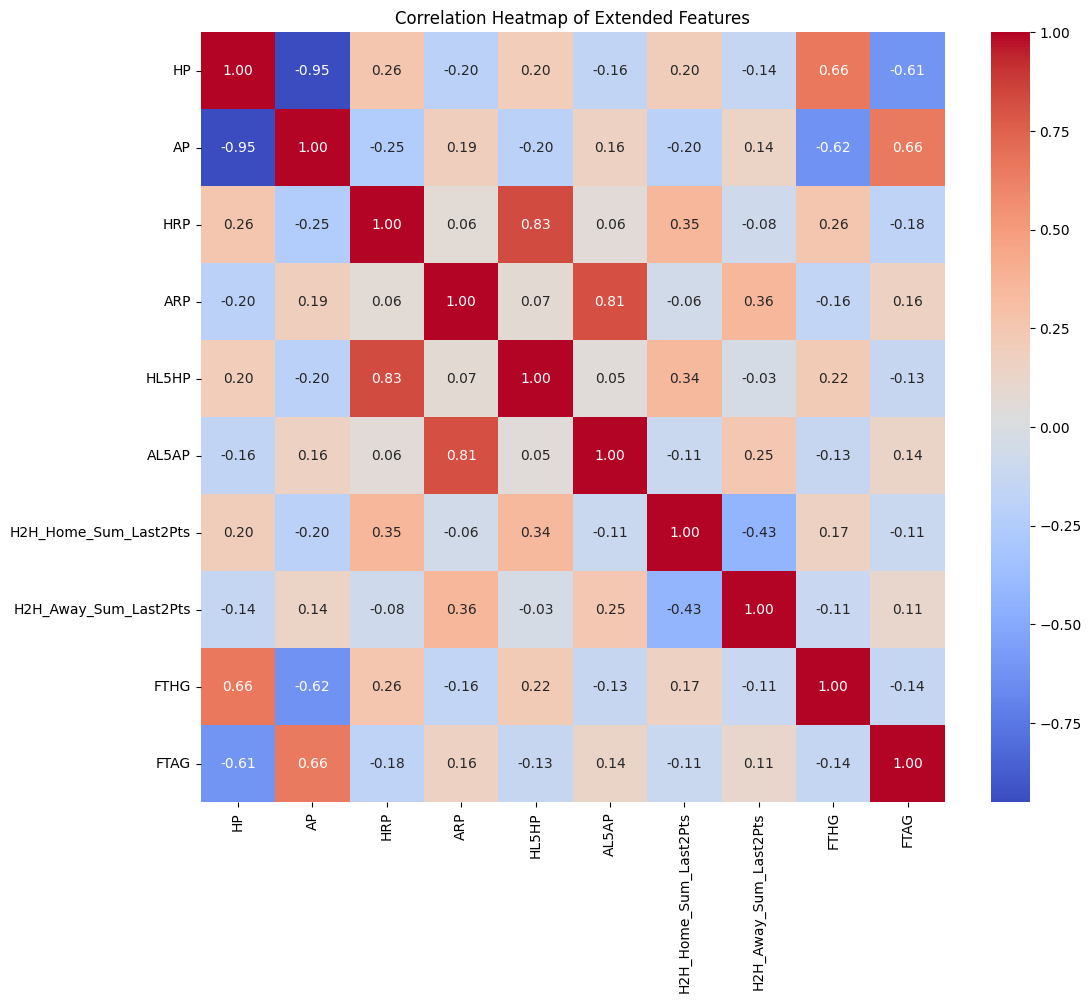

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns for the correlation heatmap
correlation_features_extended = ['HP', 'AP', 'HRP', 'ARP', 'HL5HP', 'AL5AP', 'H2H_Home_Sum_Last2Pts', 'H2H_Away_Sum_Last2Pts', 'FTHG', 'FTAG']

# Calculate the correlation matrix for the extended features
correlation_matrix_extended = filtered_df[correlation_features_extended].corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_extended, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Extended Features')
plt.show()

## Correlation with target

In [114]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_v(x, y):
    """
    Calculates Cramer's V statistic for two categorical variables.
    """
    contingency_table = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    r_minus_1, c_minus_1 = contingency_table.shape[0] - 1, contingency_table.shape[1] - 1

    # Handle cases where min(r_minus_1, c_minus_1) is zero
    min_dim = min(r_minus_1, c_minus_1)
    if min_dim == 0:
        return np.nan # Cramer's V is undefined if one variable has only one category

    v = np.sqrt(chi2 / (n * min_dim))
    return v

print("Cramer's V function defined.")

Cramer's V function defined.


In [115]:
cramers_v_referee_ftr = cramers_v(filtered_df['Referee'], filtered_df['FTR'])
print(f"Cramer's V between Referee and FTR: {cramers_v_referee_ftr:.4f}")

Cramer's V between Referee and FTR: 0.1461


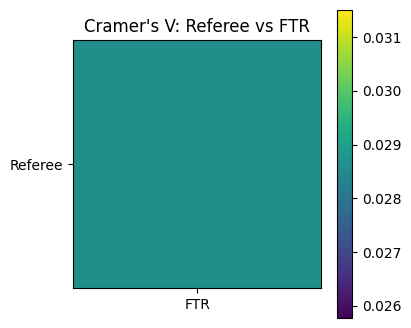

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# ---- Cramer's V function ----
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape

    # Bias correction
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)

    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))


# ---- Compute Cramer's V between the two categorical features ----
cv = cramers_v(filtered_df["Referee"], filtered_df["FTR"])

# ---- Create a 1×1 heatmap ----
heatmap_matrix = np.array([[cv]])

plt.figure(figsize=(4, 4))
plt.imshow(heatmap_matrix)
plt.colorbar()
plt.title("Cramer's V: Referee vs FTR")

plt.xticks([0], ["FTR"])
plt.yticks([0], ["Referee"])

plt.show()

In [117]:
contingency_table_therapy = pd.crosstab(filtered_df['FTR'], filtered_df['Referee'])

In [118]:
chi2_therapy, p_therapy, dof_therapy, expected_therapy = chi2_contingency(contingency_table_therapy)

In [119]:
print(f"Chi-squared statistic (FTR vs Referee): {chi2_therapy}")

Chi-squared statistic (FTR vs Referee): 81.1545999418704


In [120]:
print(f"P-value (FTR vs Referee): {p_therapy:.30f}")

P-value (FTR vs Referee): 0.381145089925894964277830467836


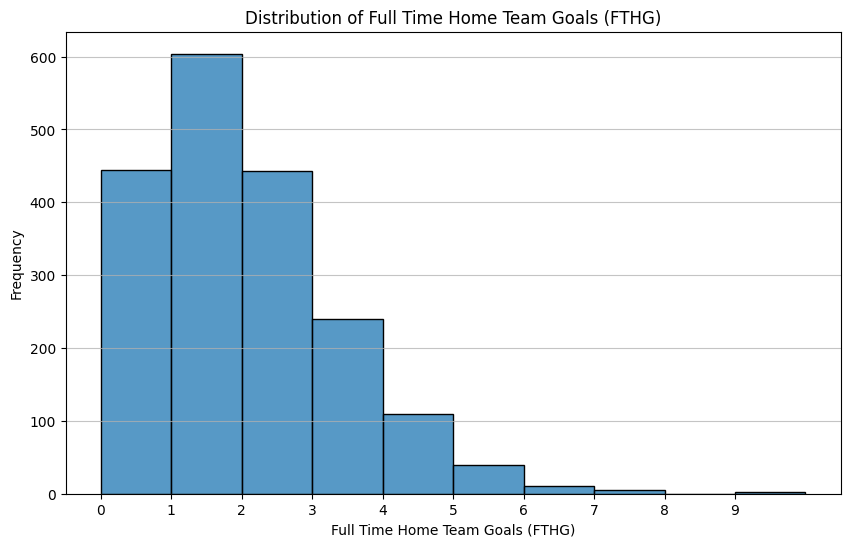

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['FTHG'], bins=range(filtered_df['FTHG'].min(), filtered_df['FTHG'].max() + 2), kde=False, edgecolor='black')
plt.title('Distribution of Full Time Home Team Goals (FTHG)')
plt.xlabel('Full Time Home Team Goals (FTHG)')
plt.ylabel('Frequency')
plt.xticks(range(filtered_df['FTHG'].min(), filtered_df['FTHG'].max() + 1))
plt.grid(axis='y', alpha=0.75)
plt.show()

In [122]:
from scipy.stats import kruskal

# Split FTHG values into groups based on FTR category
group_H = filtered_df.loc[filtered_df["FTR"] == "H", "FTHG"]
group_A = filtered_df.loc[filtered_df["FTR"] == "A", "FTHG"]
group_D = filtered_df.loc[filtered_df["FTR"] == "D", "FTHG"]

# Perform Kruskal–Wallis test
stat, p = kruskal(group_H, group_A, group_D)

print("Kruskal–Wallis H-test")
print(f"H statistic: {stat:.4f}")
print(f"p-value: {p:.6f}")

Kruskal–Wallis H-test
H statistic: 937.2058
p-value: 0.000000


# Distribution of Features

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_column_distribution(df, column_name):
    """
    Plots the distribution of a specified column in a DataFrame.
    Automatically determines if the column is numerical or categorical
    and plots a histogram or countplot accordingly.
    """
    plt.figure(figsize=(10, 6))

    # Determine if the column is numerical or categorical
    if pd.api.types.is_numeric_dtype(df[column_name]):
        # Numerical column: plot histogram
        sns.histplot(df[column_name], kde=True)
        plt.title(f'Distribution of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
    else:
        # Categorical column: plot countplot
        unique_values = df[column_name].nunique()
        if unique_values > 10: # If many unique values, consider top 10 and horizontal plot
            # Get top 10 most frequent categories
            top_categories = df[column_name].value_counts().nlargest(10).index
            df_to_plot = df[df[column_name].isin(top_categories)]
            sns.countplot(data=df_to_plot, y=column_name, order=top_categories)
            plt.title(f'Top 10 Most Frequent {column_name}')
            plt.ylabel(column_name)
            plt.xlabel('Count')
        else:
            # Plot all categories vertically
            sns.countplot(data=df, x=column_name, order=df[column_name].value_counts().index)
            plt.title(f'Distribution of {column_name}')
            plt.xlabel(column_name)
            plt.ylabel('Count')

        plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

print("plot_column_distribution function defined.")

plot_column_distribution function defined.


Plotting distribution for column: HomeTeam


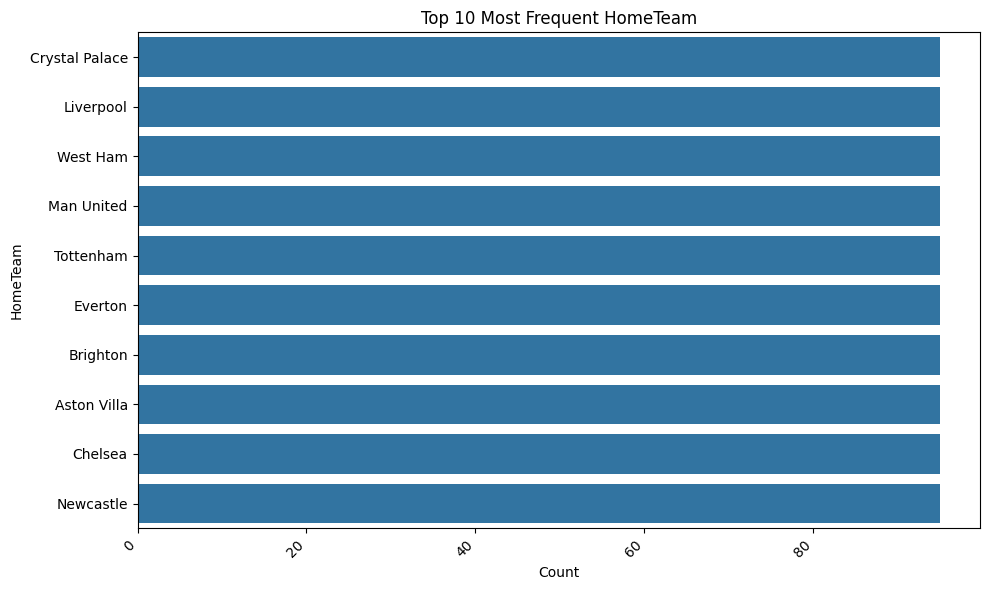

Plotting distribution for column: AwayTeam


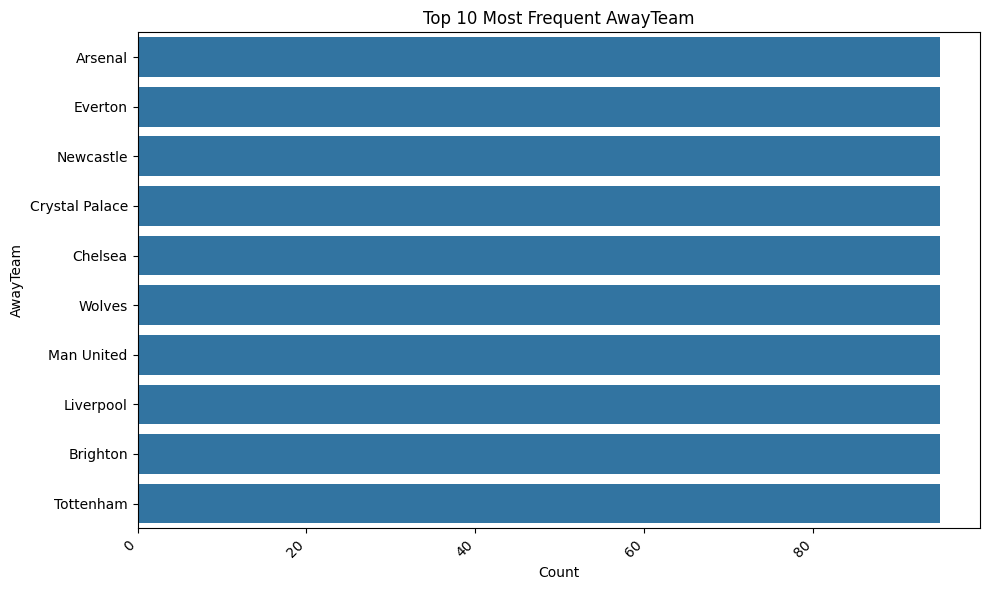

Plotting distribution for column: FTHG


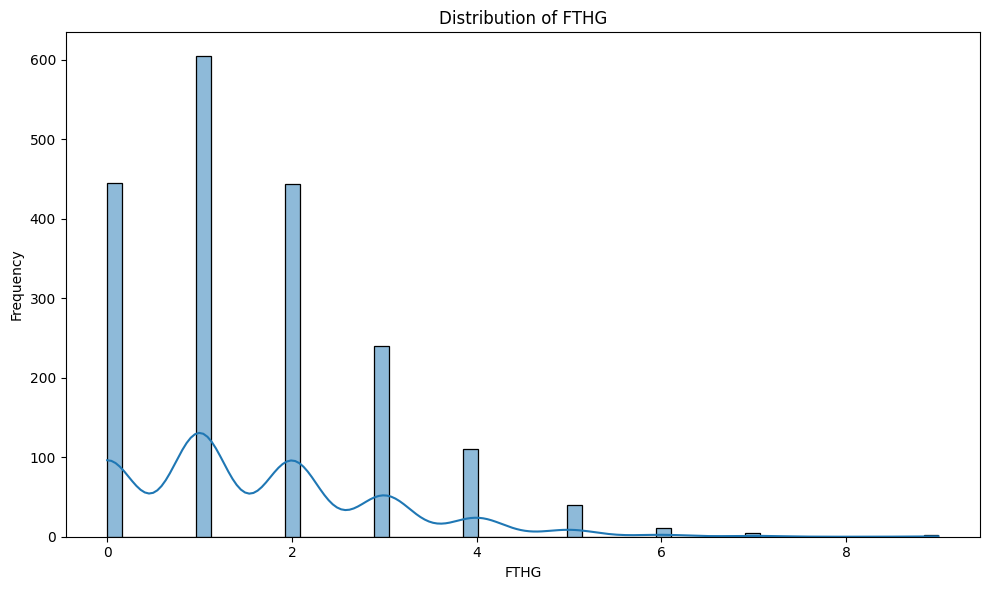

Plotting distribution for column: FTAG


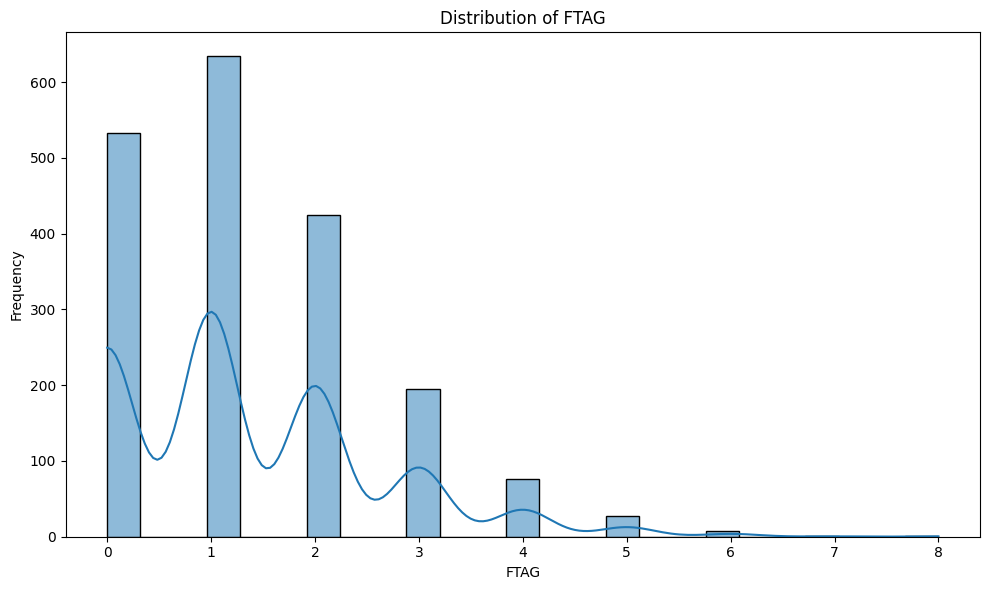

Plotting distribution for column: HTHG


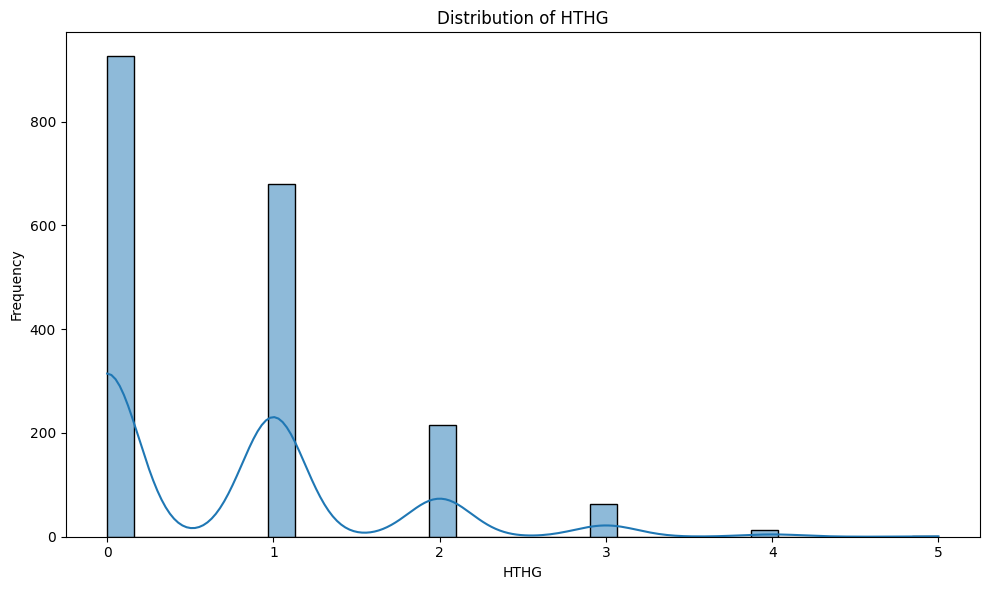

Plotting distribution for column: HTAG


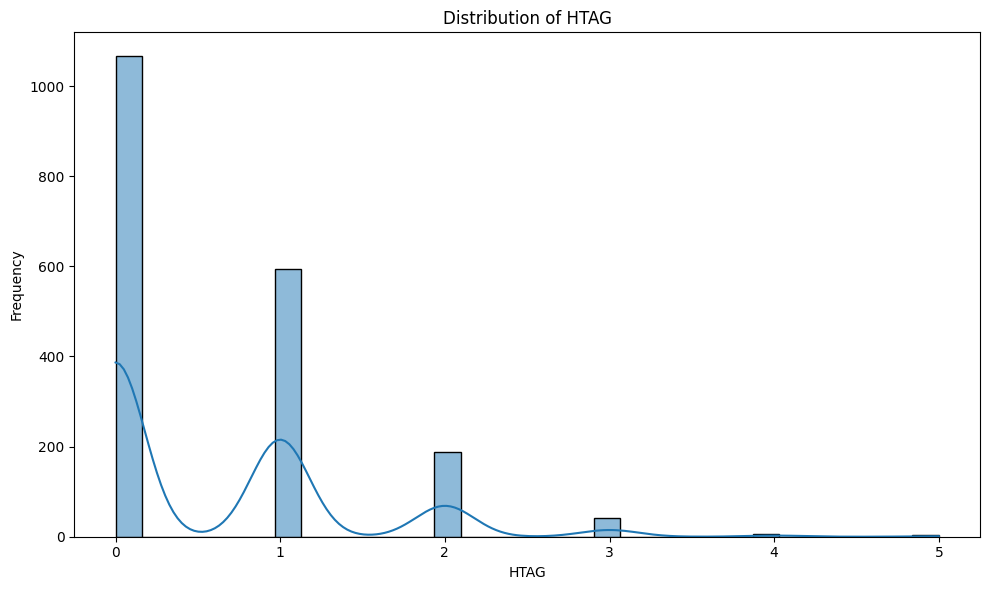

Plotting distribution for column: HTR


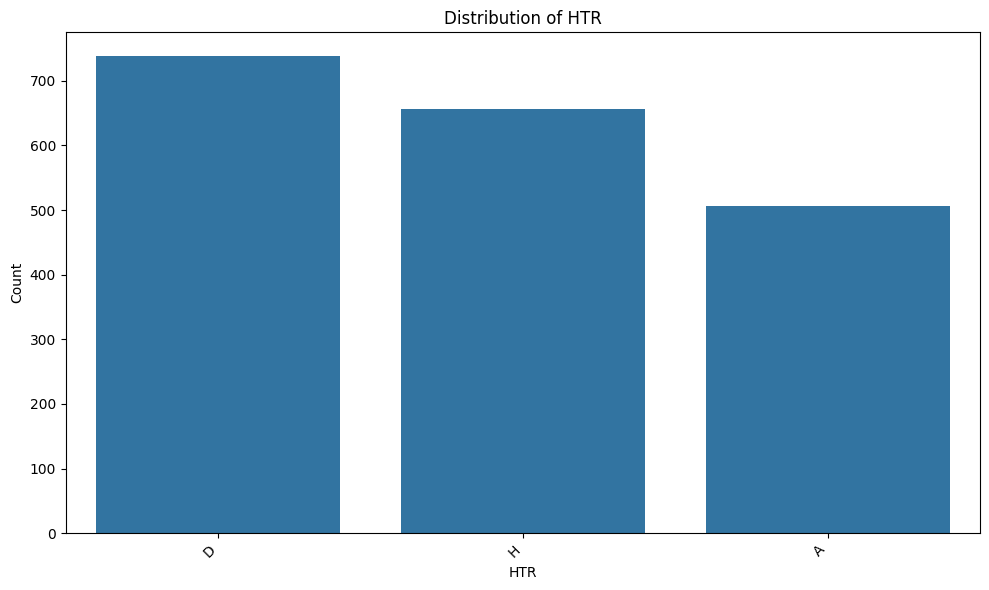

Plotting distribution for column: Referee


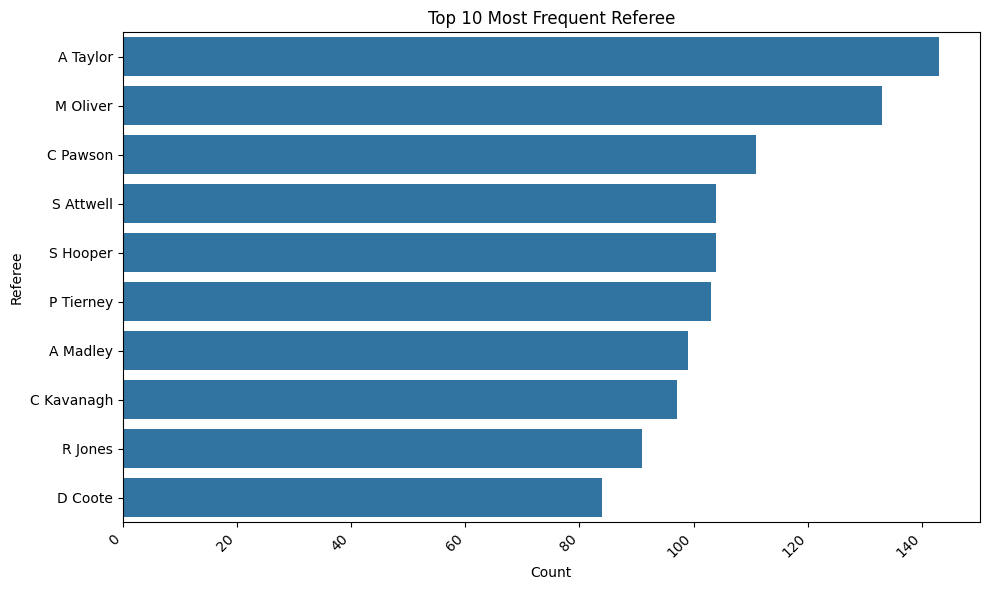

Plotting distribution for column: HS


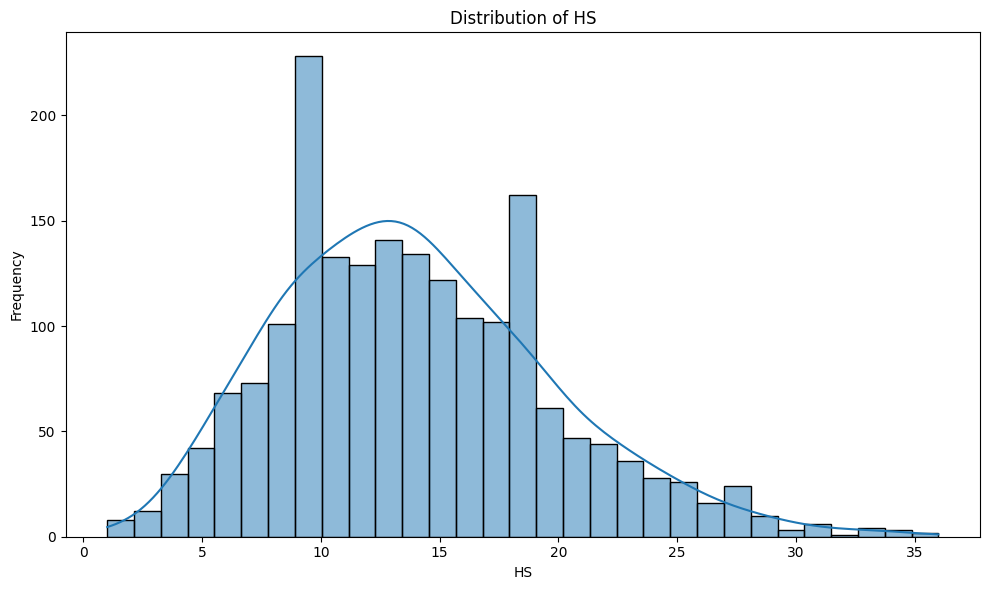

Plotting distribution for column: AS


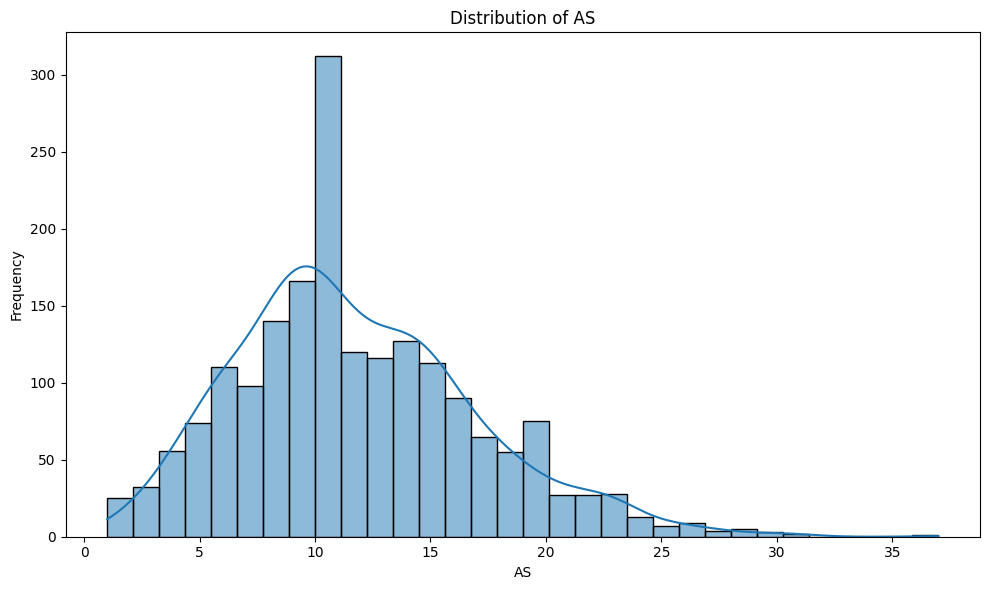

Plotting distribution for column: HST


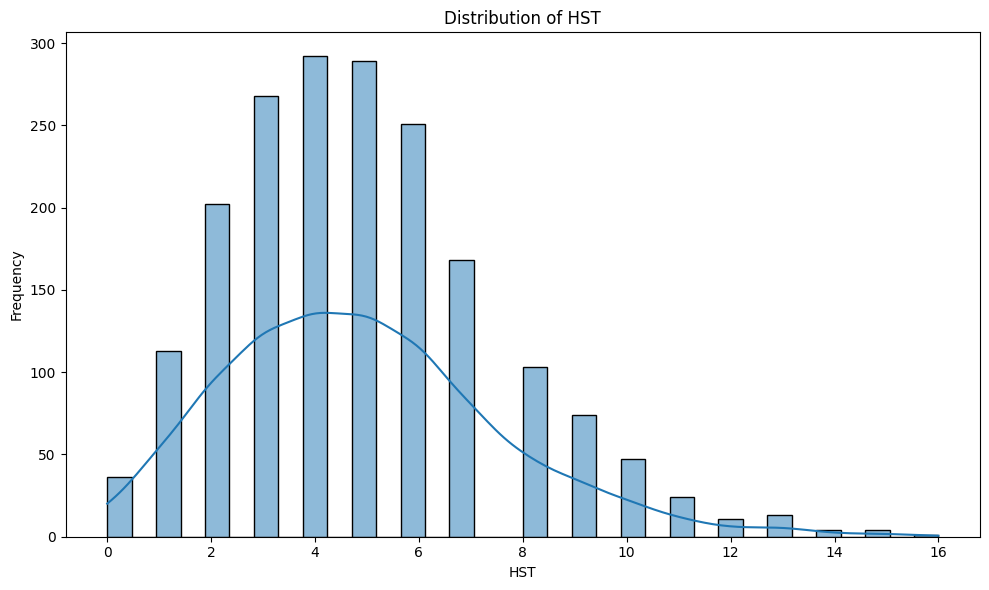

Plotting distribution for column: AST


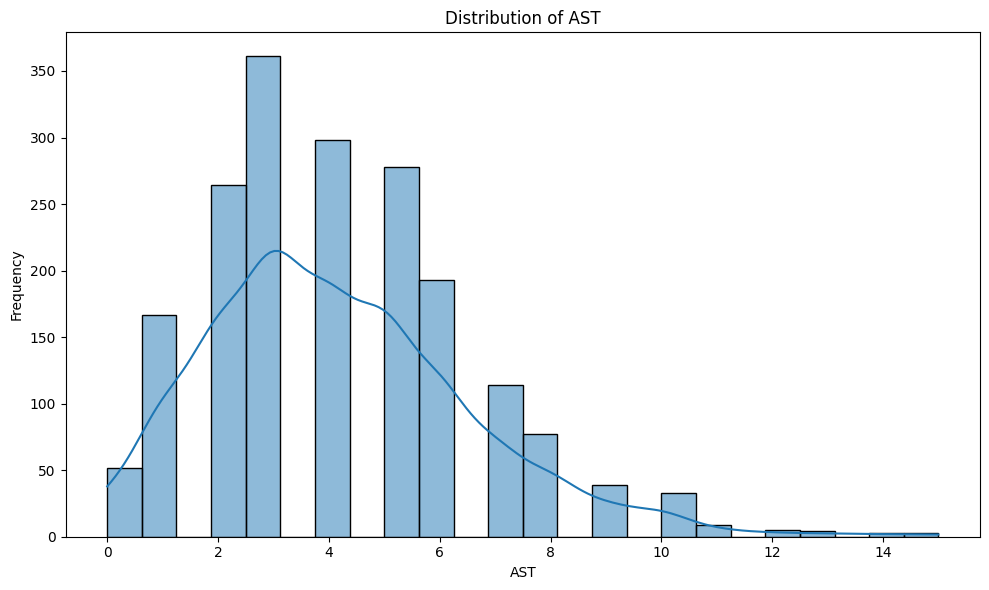

Plotting distribution for column: HF


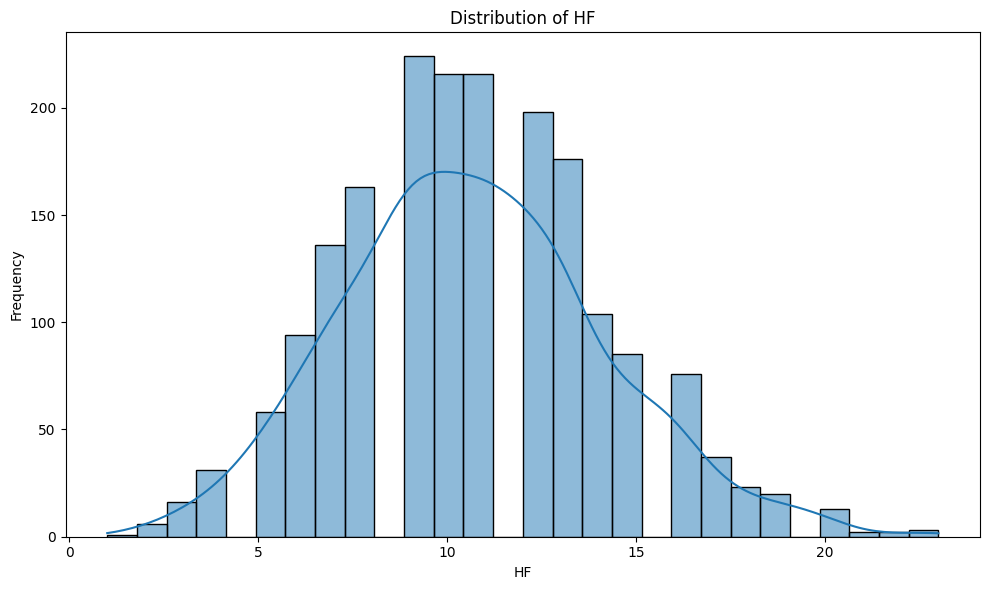

Plotting distribution for column: AF


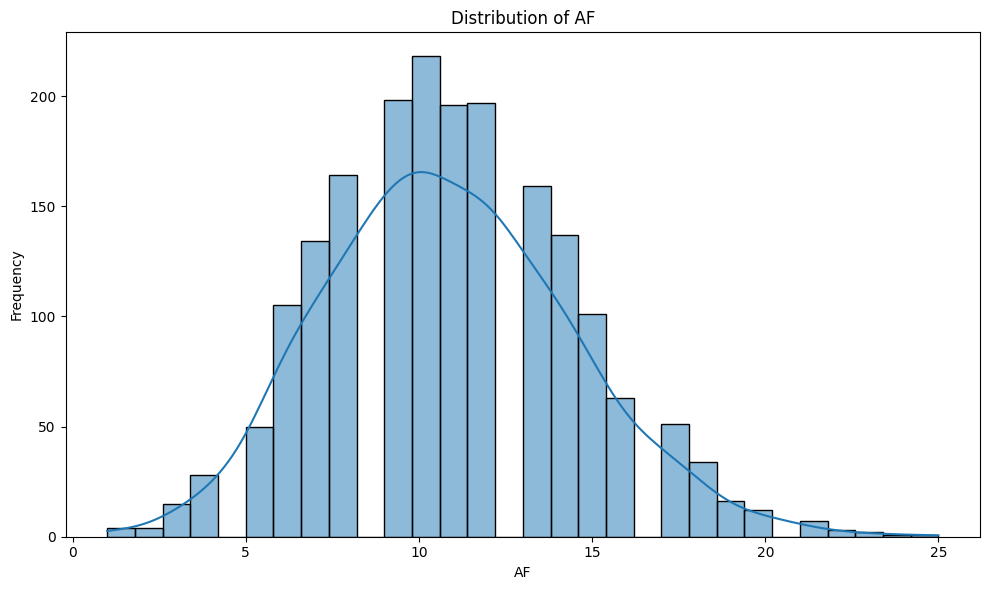

Plotting distribution for column: HC


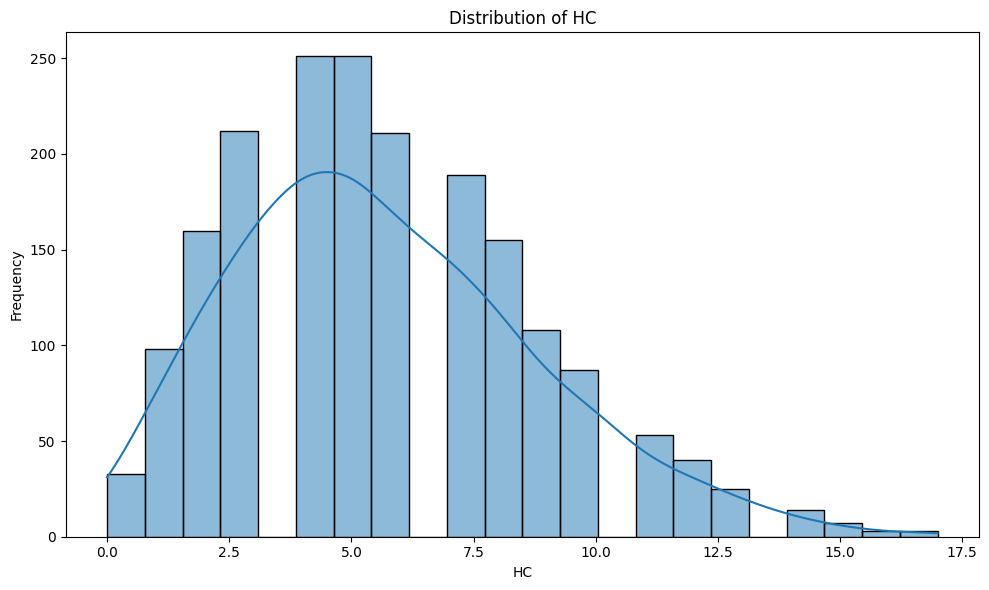

Plotting distribution for column: AC


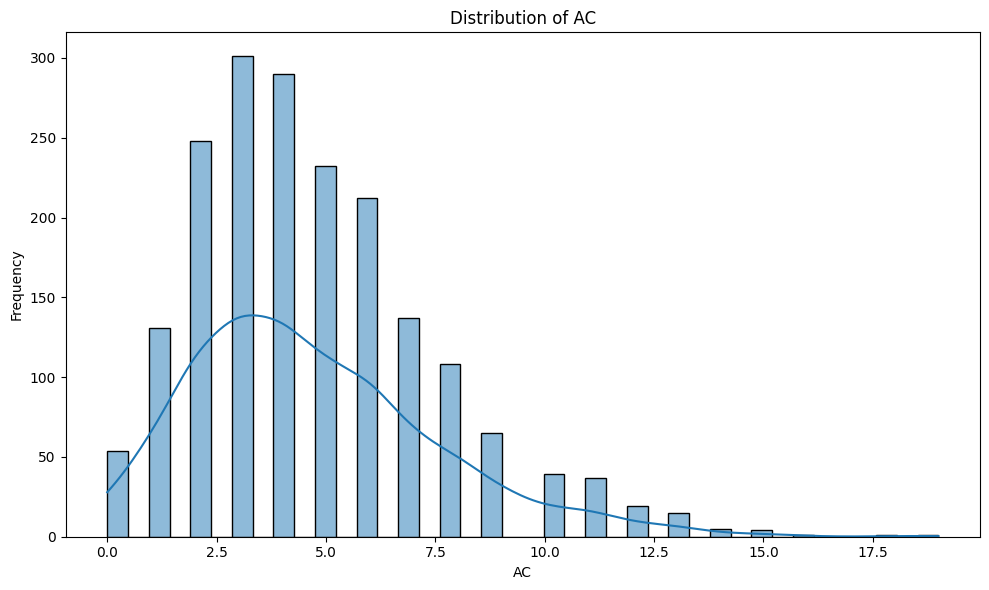

Plotting distribution for column: HY


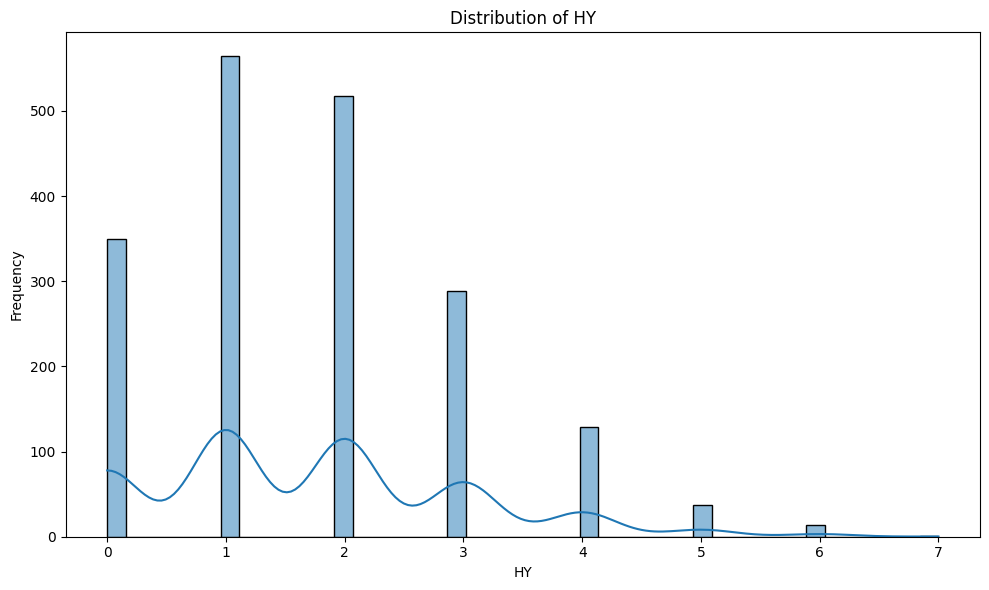

Plotting distribution for column: AY


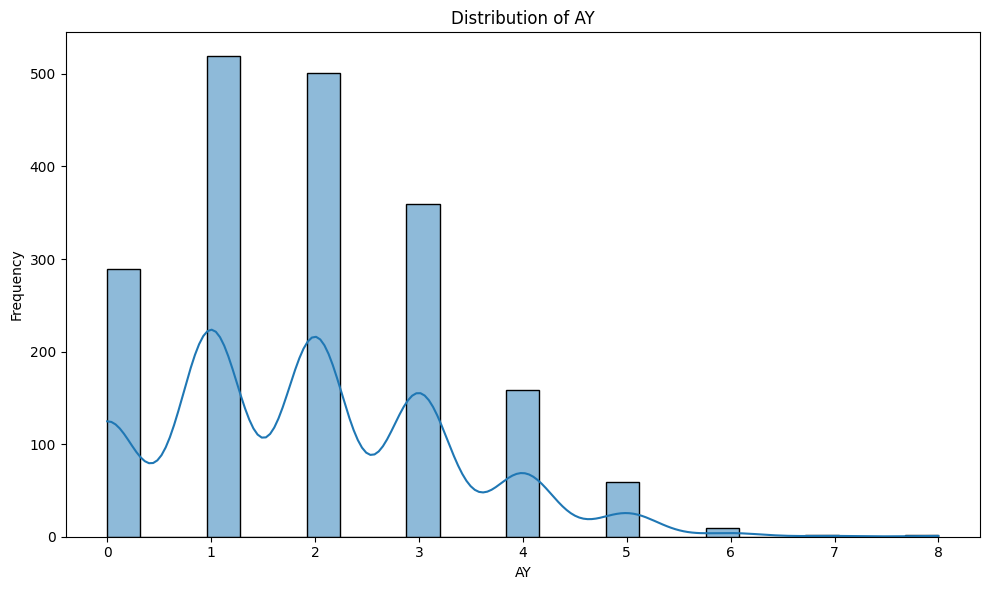

Plotting distribution for column: HR


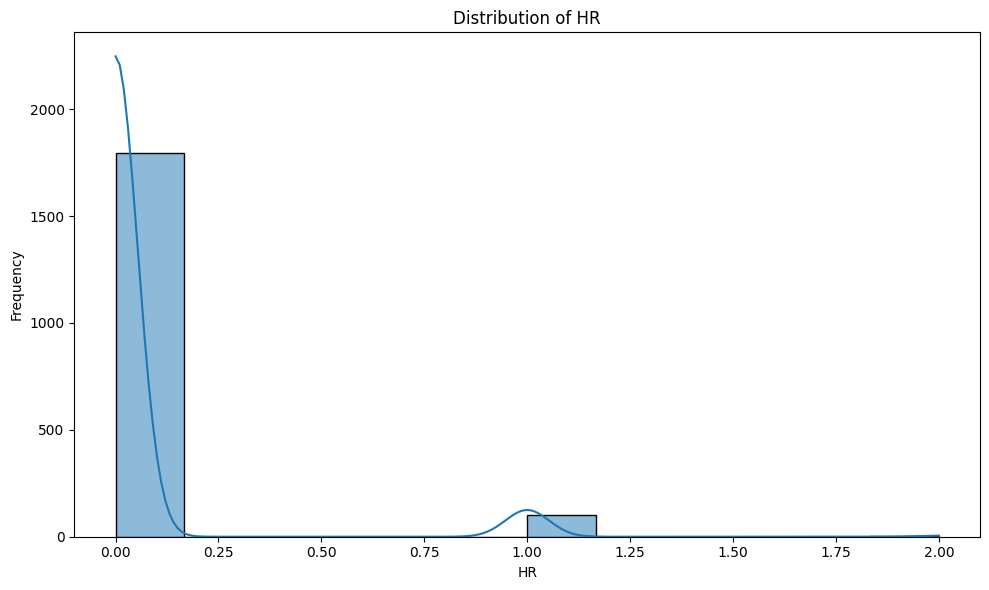

Plotting distribution for column: AR


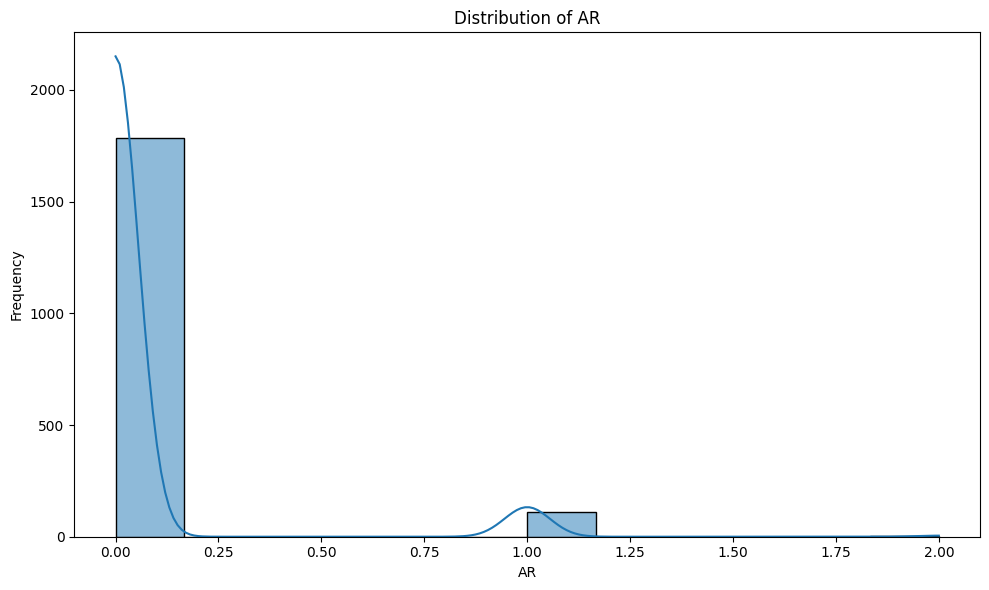

Plotting distribution for column: FTR


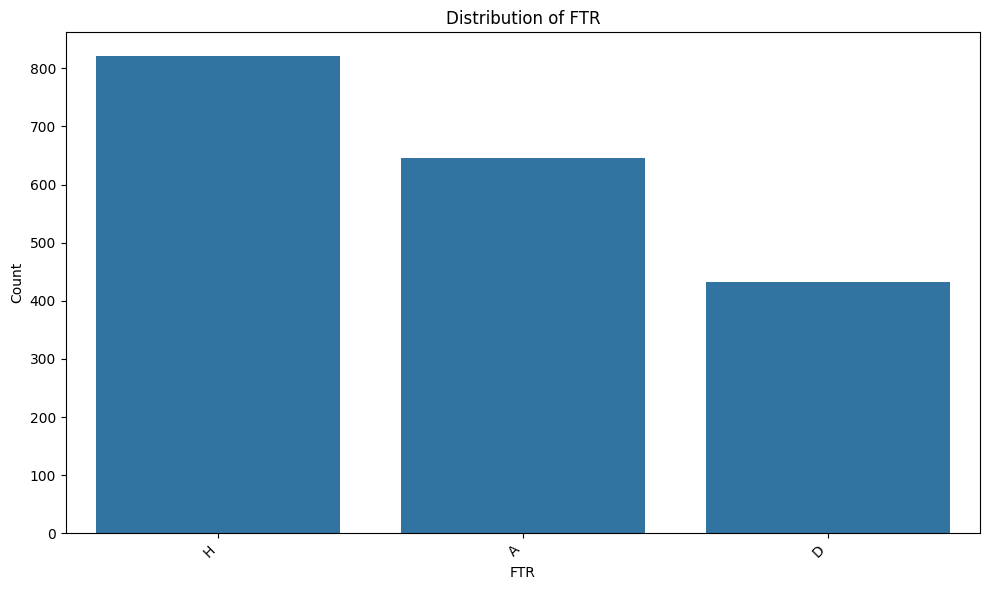

Plotting distribution for column: HP


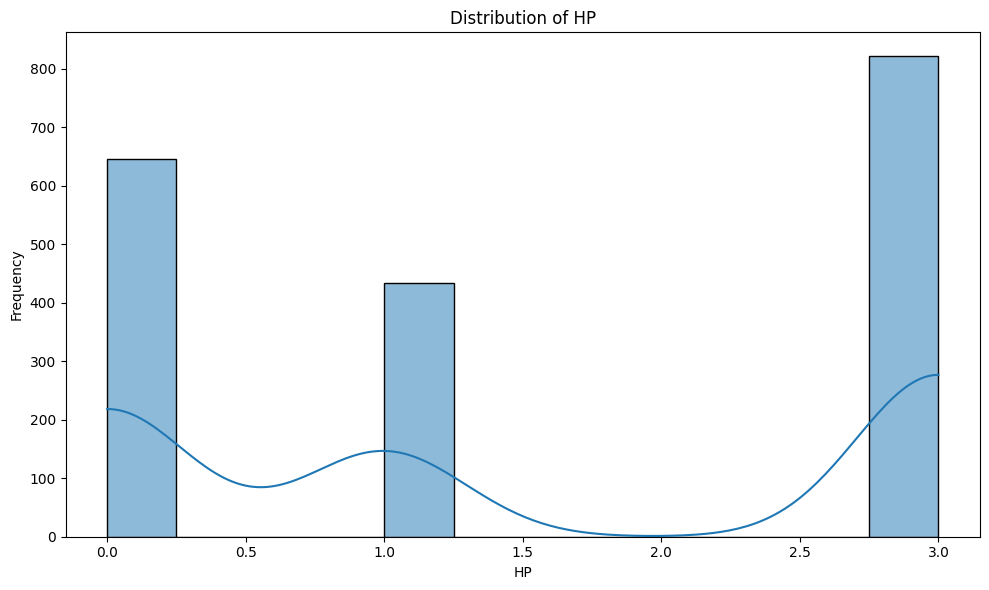

Plotting distribution for column: AP


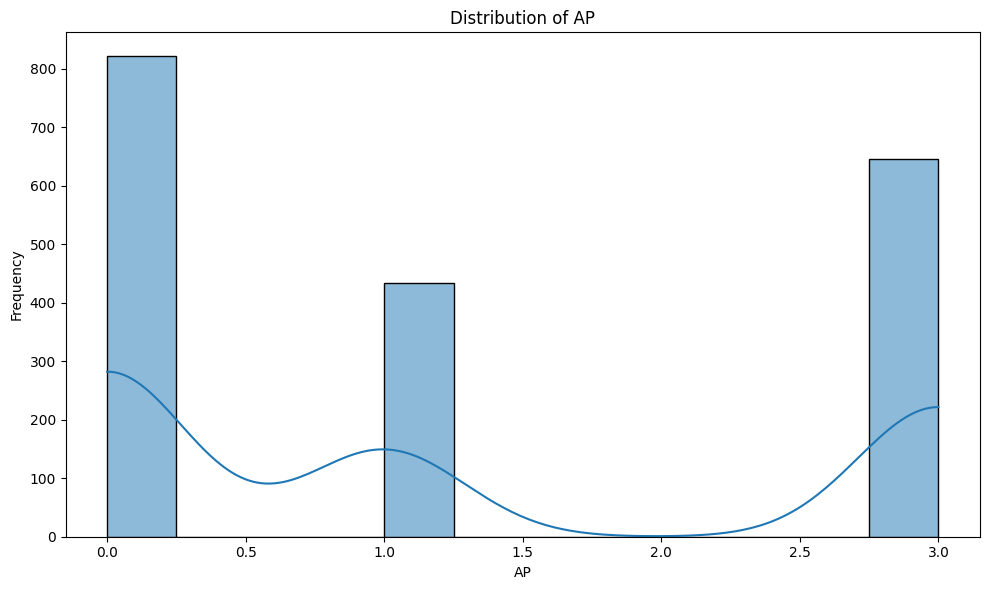

Plotting distribution for column: HRP


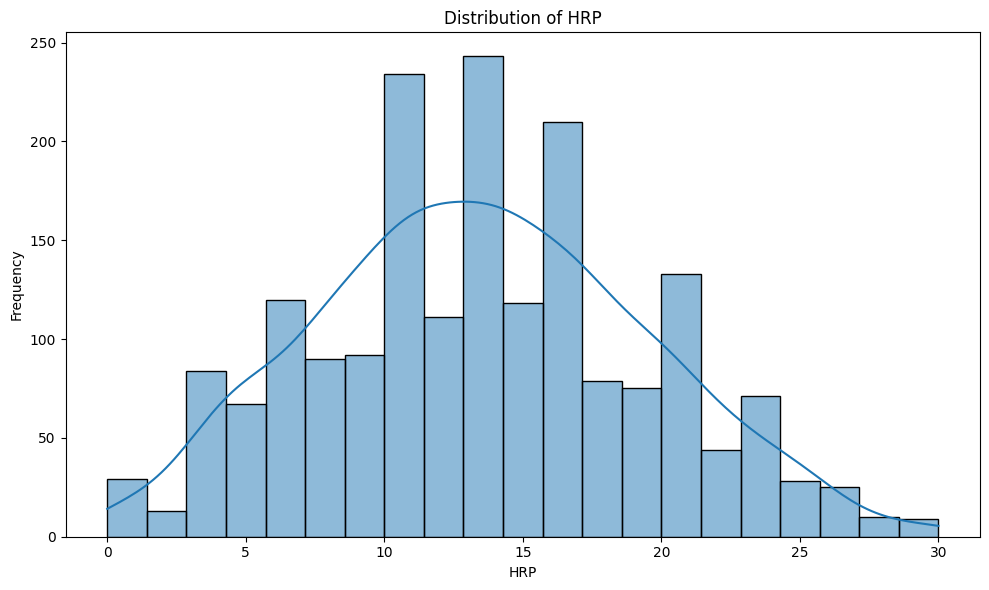

Plotting distribution for column: ARP


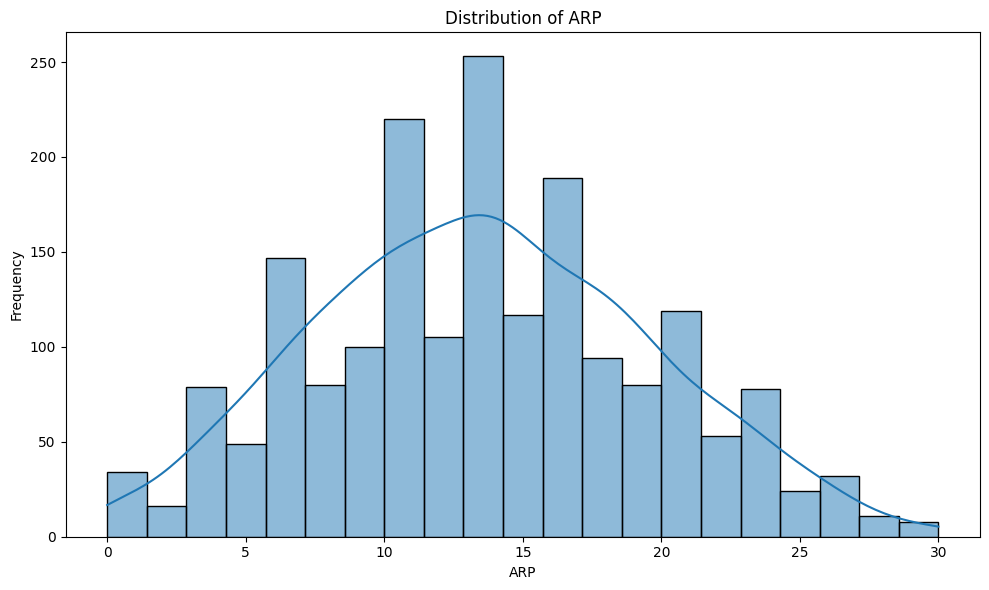

Plotting distribution for column: HL5HP


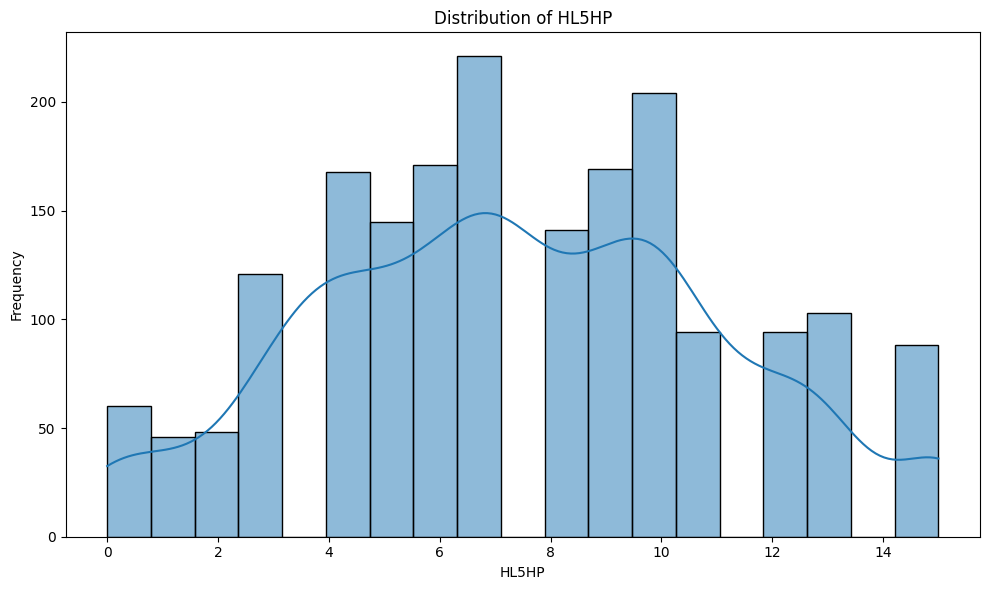

Plotting distribution for column: AL5AP


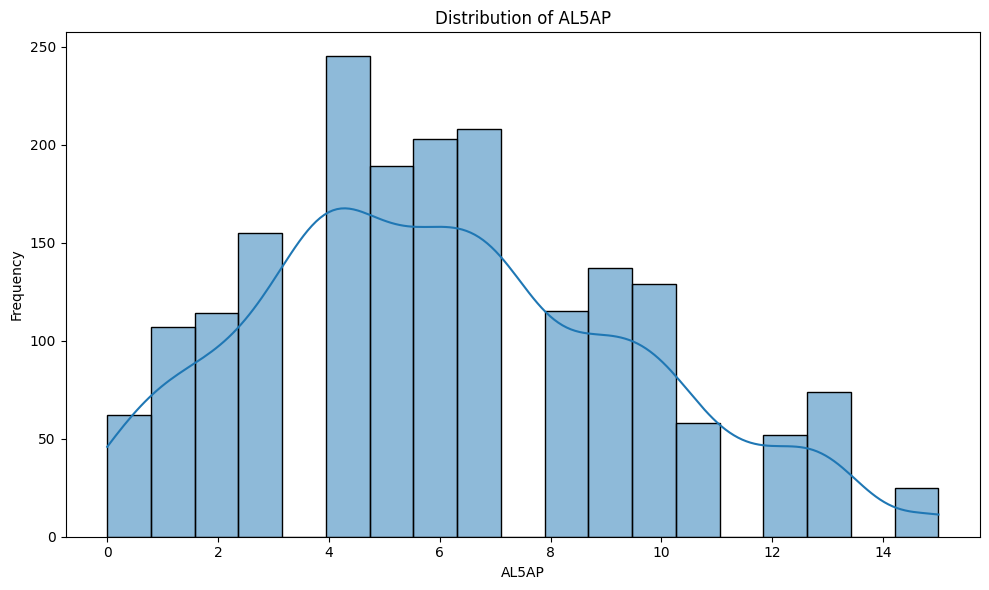

Plotting distribution for column: H2H_Home_Sum_Last2Pts


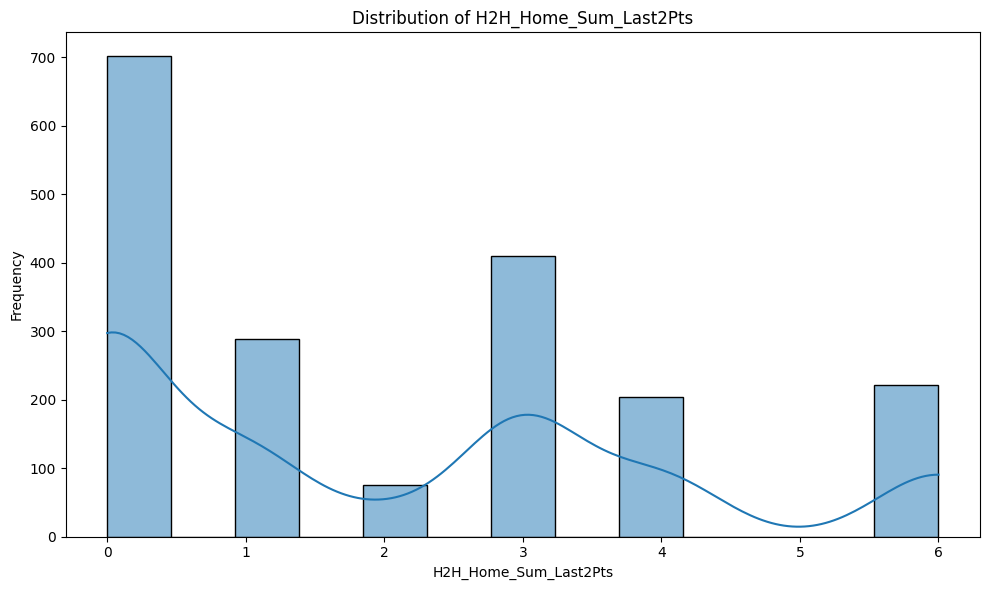

Plotting distribution for column: H2H_Away_Sum_Last2Pts


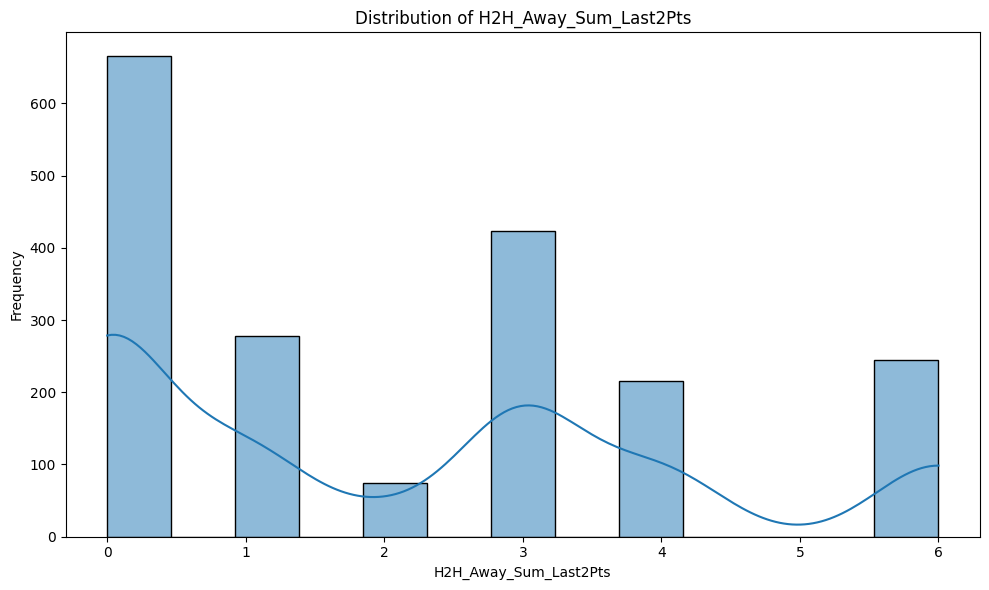

Plotting distribution for column: FTR_encoded


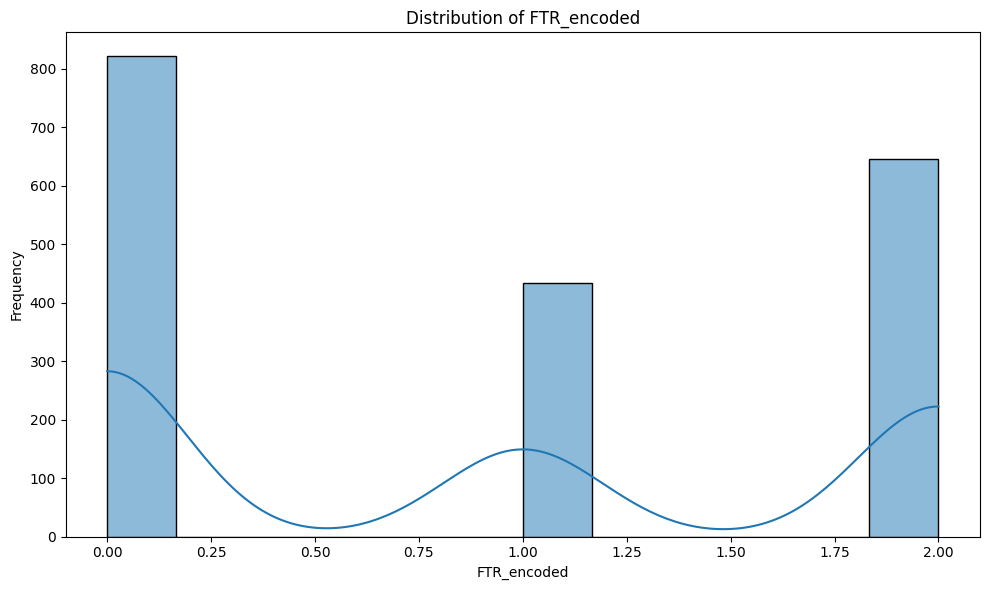

In [124]:
columns_to_plot = [col for col in filtered_df.columns if col != 'MatchOrder']

for column in columns_to_plot:
    print(f"Plotting distribution for column: {column}")
    plot_column_distribution(filtered_df, column)

In [125]:
exclusion_list = ['HTR', 'FTR', 'HP', 'AP', 'FTR_encoded']
numerical_cols_for_shapiro = []

for col in filtered_df.columns:
    if pd.api.types.is_numeric_dtype(filtered_df[col]) and col not in exclusion_list:
        numerical_cols_for_shapiro.append(col)

print(f"Columns identified for Shapiro-Wilk test: {numerical_cols_for_shapiro}")

Columns identified for Shapiro-Wilk test: ['FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'MatchOrder', 'HRP', 'ARP', 'HL5HP', 'AL5AP', 'H2H_Home_Sum_Last2Pts', 'H2H_Away_Sum_Last2Pts']


# Handle Null Values

In [134]:
filtered_df.columns

Index(['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HTHG', 'HTAG', 'HTR',
       'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY',
       'HR', 'AR', 'FTR', 'MatchOrder', 'HP', 'AP', 'HRP', 'ARP', 'HL5HP',
       'AL5AP', 'H2H_Home_Sum_Last2Pts', 'H2H_Away_Sum_Last2Pts',
       'FTR_encoded'],
      dtype='object')

In [135]:
display(filtered_df.isnull().sum())

,0
HomeTeam,0
AwayTeam,0
FTHG,0
FTAG,0
HTHG,0
HTAG,0
HTR,0
Referee,0
HS,0
AS,0


In [136]:
filtered_df = filtered_df.fillna(0)
display(filtered_df.head())

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,...,MatchOrder,HP,AP,HRP,ARP,HL5HP,AL5AP,H2H_Home_Sum_Last2Pts,H2H_Away_Sum_Last2Pts,FTR_encoded
0,Fulham,Arsenal,0,3,0,1,A,C Kavanagh,5,13,...,1,0,3,0.0,0.0,0.0,0.0,0,0,2
1,Crystal Palace,Southampton,1,0,1,0,H,J Moss,5,9,...,2,3,0,0.0,0.0,0.0,0.0,0,0,0
2,Liverpool,Leeds,4,3,3,2,H,M Oliver,22,6,...,3,3,0,0.0,0.0,0.0,0.0,0,0,0
3,West Ham,Newcastle,0,2,0,0,D,S Attwell,15,15,...,4,0,3,0.0,0.0,0.0,0.0,0,0,2
4,West Brom,Leicester,0,3,0,0,D,A Taylor,7,13,...,5,0,3,0.0,0.0,0.0,0.0,0,0,2


# Drop Unrelated Columns

In [137]:
filtered_df.columns

Index(['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HTHG', 'HTAG', 'HTR',
       'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY',
       'HR', 'AR', 'FTR', 'MatchOrder', 'HP', 'AP', 'HRP', 'ARP', 'HL5HP',
       'AL5AP', 'H2H_Home_Sum_Last2Pts', 'H2H_Away_Sum_Last2Pts',
       'FTR_encoded'],
      dtype='object')

In [138]:
filtered_df = filtered_df.drop(columns=['MatchOrder', 'FTR_encoded'])
display(filtered_df.head())

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,...,AR,FTR,HP,AP,HRP,ARP,HL5HP,AL5AP,H2H_Home_Sum_Last2Pts,H2H_Away_Sum_Last2Pts
0,Fulham,Arsenal,0,3,0,1,A,C Kavanagh,5,13,...,0,A,0,3,0.0,0.0,0.0,0.0,0,0
1,Crystal Palace,Southampton,1,0,1,0,H,J Moss,5,9,...,0,H,3,0,0.0,0.0,0.0,0.0,0,0
2,Liverpool,Leeds,4,3,3,2,H,M Oliver,22,6,...,0,H,3,0,0.0,0.0,0.0,0.0,0,0
3,West Ham,Newcastle,0,2,0,0,D,S Attwell,15,15,...,0,A,0,3,0.0,0.0,0.0,0.0,0,0
4,West Brom,Leicester,0,3,0,0,D,A Taylor,7,13,...,0,A,0,3,0.0,0.0,0.0,0.0,0,0


# Encode Referee and HTR

In [139]:
referee_encoded = pd.get_dummies(filtered_df['Referee'], prefix='Referee', dtype=int)
filtered_df = pd.concat([filtered_df, referee_encoded], axis=1)
filtered_df = filtered_df.drop('Referee', axis=1)
display(filtered_df.head())

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,HS,AS,HST,...,Referee_R Madley,Referee_R Welch,Referee_S Allison,Referee_S Attwell,Referee_S Barrott,Referee_S Hooper,Referee_S Singh,Referee_T Bramall,Referee_T Harrington,Referee_T Robinson
0,Fulham,Arsenal,0,3,0,1,A,5,13,2,...,0,0,0,0,0,0,0,0,0,0
1,Crystal Palace,Southampton,1,0,1,0,H,5,9,3,...,0,0,0,0,0,0,0,0,0,0
2,Liverpool,Leeds,4,3,3,2,H,22,6,6,...,0,0,0,0,0,0,0,0,0,0
3,West Ham,Newcastle,0,2,0,0,D,15,15,3,...,0,0,0,1,0,0,0,0,0,0
4,West Brom,Leicester,0,3,0,0,D,7,13,1,...,0,0,0,0,0,0,0,0,0,0


In [140]:
referee_encoded = pd.get_dummies(filtered_df['HTR'], prefix='HTR', dtype=int)
filtered_df = pd.concat([filtered_df, referee_encoded], axis=1)
filtered_df = filtered_df.drop('HTR', axis=1)
display(filtered_df.head())

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,...,Referee_S Attwell,Referee_S Barrott,Referee_S Hooper,Referee_S Singh,Referee_T Bramall,Referee_T Harrington,Referee_T Robinson,HTR_A,HTR_D,HTR_H
0,Fulham,Arsenal,0,3,0,1,5,13,2,6,...,0,0,0,0,0,0,0,1,0,0
1,Crystal Palace,Southampton,1,0,1,0,5,9,3,5,...,0,0,0,0,0,0,0,0,0,1
2,Liverpool,Leeds,4,3,3,2,22,6,6,3,...,0,0,0,0,0,0,0,0,0,1
3,West Ham,Newcastle,0,2,0,0,15,15,3,2,...,1,0,0,0,0,0,0,0,1,0
4,West Brom,Leicester,0,3,0,0,7,13,1,7,...,0,0,0,0,0,0,0,0,1,0


In [141]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 70 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   HomeTeam               1900 non-null   object 
 1   AwayTeam               1900 non-null   object 
 2   FTHG                   1900 non-null   int64  
 3   FTAG                   1900 non-null   int64  
 4   HTHG                   1900 non-null   int64  
 5   HTAG                   1900 non-null   int64  
 6   HS                     1900 non-null   int64  
 7   AS                     1900 non-null   int64  
 8   HST                    1900 non-null   int64  
 9   AST                    1900 non-null   int64  
 10  HF                     1900 non-null   int64  
 11  AF                     1900 non-null   int64  
 12  HC                     1900 non-null   int64  
 13  AC                     1900 non-null   int64  
 14  HY                     1900 non-null   int64  
 15  AY  

# Drop Some More Columns

In [142]:
columns_to_drop = [
    'FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF',
    'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'HP', 'AP', 'HTR_A', 'HTR_D', 'HTR_H'
]
filtered_df = filtered_df.drop(columns=columns_to_drop, errors='ignore')
display(filtered_df.head())

,HomeTeam,AwayTeam,FTR,HRP,ARP,HL5HP,AL5AP,H2H_Home_Sum_Last2Pts,H2H_Away_Sum_Last2Pts,Referee_A Kitchen,...,Referee_R Madley,Referee_R Welch,Referee_S Allison,Referee_S Attwell,Referee_S Barrott,Referee_S Hooper,Referee_S Singh,Referee_T Bramall,Referee_T Harrington,Referee_T Robinson
0,Fulham,Arsenal,A,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Crystal Palace,Southampton,H,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Liverpool,Leeds,H,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,West Ham,Newcastle,A,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,West Brom,Leicester,A,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
filtered_df.columns

Index(['HomeTeam', 'AwayTeam', 'FTR', 'HRP', 'ARP', 'HL5HP', 'AL5AP',
       'H2H_Home_Sum_Last2Pts', 'H2H_Away_Sum_Last2Pts', 'Referee_A Kitchen',
       'Referee_A Madley', 'Referee_A Marriner', 'Referee_A Moss',
       'Referee_A Taylor', 'Referee_C Kavanagh', 'Referee_C Pawson',
       'Referee_D Bond', 'Referee_D Coote', 'Referee_D England',
       'Referee_D Webb', 'Referee_G Scott', 'Referee_J Brooks',
       'Referee_J Gillett', 'Referee_J Gillett ', 'Referee_J Moss',
       'Referee_J Smith', 'Referee_K Friend', 'Referee_K Kavanagh',
       'Referee_L Mason', 'Referee_L Smith', 'Referee_M Atkinson',
       'Referee_M Dean', 'Referee_M Donohue', 'Referee_M Oliver',
       'Referee_M Salisbury', 'Referee_O Oliver', 'Referee_P Bankes',
       'Referee_P Tierney', 'Referee_R Jones', 'Referee_R Madley',
       'Referee_R Welch', 'Referee_S Allison', 'Referee_S Attwell',
       'Referee_S Barrott', 'Referee_S Hooper', 'Referee_S Singh',
       'Referee_T Bramall', 'Referee_T Harring

#Encode Teams

In [148]:
home_team_encoded = pd.get_dummies(filtered_df['HomeTeam'], prefix='HomeTeam', dtype=int)
away_team_encoded = pd.get_dummies(filtered_df['AwayTeam'], prefix='AwayTeam', dtype=int)

filtered_df = pd.concat([filtered_df, home_team_encoded, away_team_encoded], axis=1)
filtered_df = filtered_df.drop(columns=['HomeTeam', 'AwayTeam'])

display(filtered_df.head())

,FTR,HRP,ARP,HL5HP,AL5AP,H2H_Home_Sum_Last2Pts,H2H_Away_Sum_Last2Pts,Referee_A Kitchen,Referee_A Madley,Referee_A Marriner,...,AwayTeam_Newcastle,AwayTeam_Norwich,AwayTeam_Nott'm Forest,AwayTeam_Sheffield United,AwayTeam_Southampton,AwayTeam_Tottenham,AwayTeam_Watford,AwayTeam_West Brom,AwayTeam_West Ham,AwayTeam_Wolves
0,A,0.0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,H,0.0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,H,0.0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A,0.0,0.0,0.0,0.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,A,0.0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Split the Dataset

In [150]:
from sklearn.model_selection import train_test_split

X = filtered_df.drop('FTR', axis=1) # Features are all columns except 'FTR'
y = filtered_df['FTR'] # Target is the 'FTR' column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1520, 100)
X_test shape: (380, 100)
y_train shape: (1520,)
y_test shape: (380,)


In [151]:
X.columns

Index(['HRP', 'ARP', 'HL5HP', 'AL5AP', 'H2H_Home_Sum_Last2Pts',
       'H2H_Away_Sum_Last2Pts', 'Referee_A Kitchen', 'Referee_A Madley',
       'Referee_A Marriner', 'Referee_A Moss', 'Referee_A Taylor',
       'Referee_C Kavanagh', 'Referee_C Pawson', 'Referee_D Bond',
       'Referee_D Coote', 'Referee_D England', 'Referee_D Webb',
       'Referee_G Scott', 'Referee_J Brooks', 'Referee_J Gillett',
       'Referee_J Gillett ', 'Referee_J Moss', 'Referee_J Smith',
       'Referee_K Friend', 'Referee_K Kavanagh', 'Referee_L Mason',
       'Referee_L Smith', 'Referee_M Atkinson', 'Referee_M Dean',
       'Referee_M Donohue', 'Referee_M Oliver', 'Referee_M Salisbury',
       'Referee_O Oliver', 'Referee_P Bankes', 'Referee_P Tierney',
       'Referee_R Jones', 'Referee_R Madley', 'Referee_R Welch',
       'Referee_S Allison', 'Referee_S Attwell', 'Referee_S Barrott',
       'Referee_S Hooper', 'Referee_S Singh', 'Referee_T Bramall',
       'Referee_T Harrington', 'Referee_T Robinson', 'Ho

# Train and Test Distribution

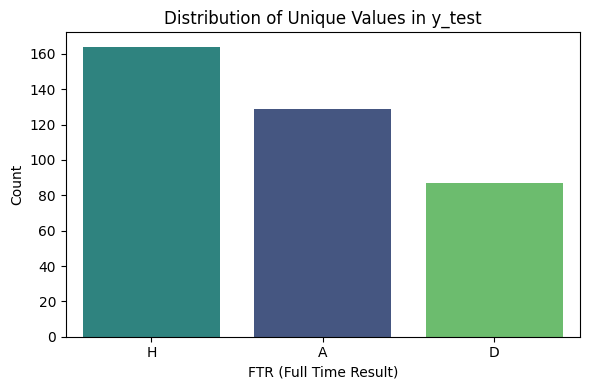

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x=y_test, hue=y_test, order=y_test.value_counts().index, palette='viridis', legend=False)
plt.title('Distribution of Unique Values in y_test')
plt.xlabel('FTR (Full Time Result)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Modeling

## Random Forrest

In [153]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42) # Using a fixed random_state for reproducibility

# Fit the model to the training data
rf_model.fit(X_train, y_train)

print("Random Forest Classifier fitted successfully!")

Random Forest Classifier fitted successfully!


In [154]:
from sklearn.metrics import accuracy_score

y_train_pred = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

print(f"Random Forest Classifier Training Accuracy: {train_accuracy:.4f}")

Random Forest Classifier Training Accuracy: 1.0000


In [155]:
from sklearn.metrics import accuracy_score

y_test_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Random Forest Classifier Test Accuracy: {test_accuracy:.4f}")

Random Forest Classifier Test Accuracy: 0.4895


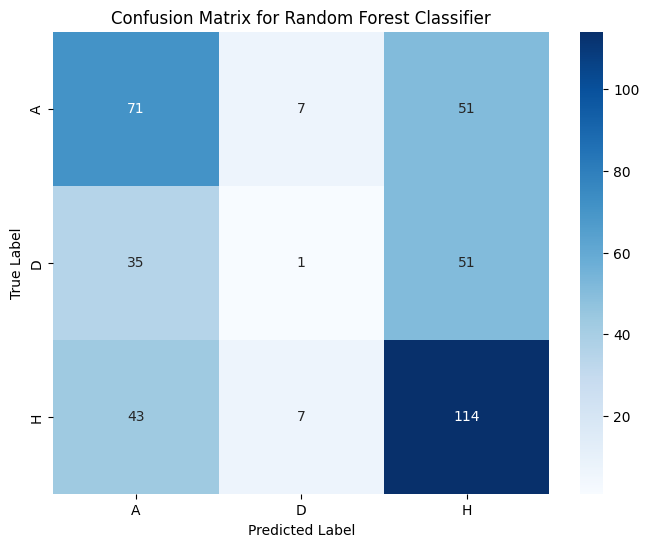

In [156]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions from the Random Forest model on the test set
y_test_pred = rf_model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Get unique classes from y_test for labels
class_labels = sorted(y_test.unique())

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Top 20 Feature Importances for Random Forest Classifier:


,Feature,Importance
0,HRP,0.093737
1,ARP,0.090586
2,HL5HP,0.078953
3,AL5AP,0.073730
4,H2H_Home_Sum_Last2Pts,0.046633
5,H2H_Away_Sum_Last2Pts,0.043138
10,Referee_A Taylor,0.012408
54,HomeTeam_Everton,0.010998
77,AwayTeam_Brighton,0.010919
50,HomeTeam_Brighton,0.010833


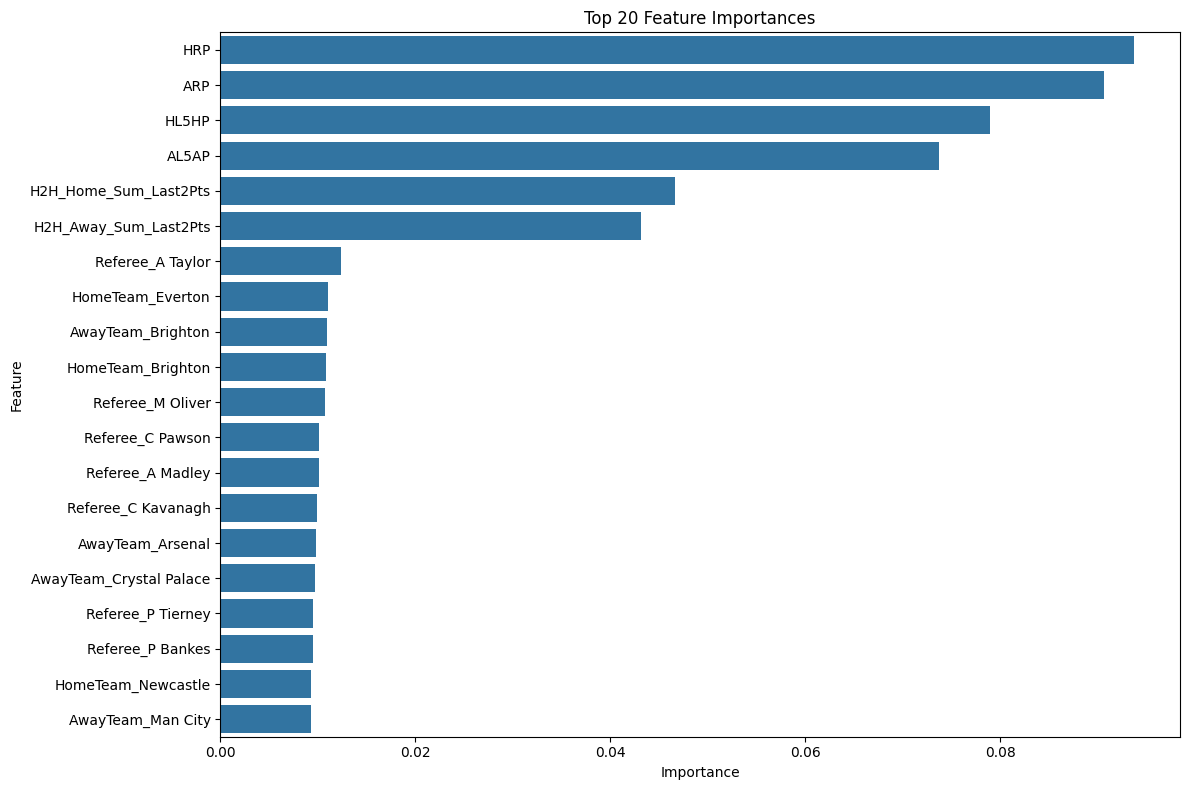

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

# Get feature names from X_train
feature_names = X_train.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top N features (e.g., top 20)
print("Top 20 Feature Importances for Random Forest Classifier:")
display(importance_df.head(20))

# Visualize feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Logistic Regression

In [157]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
# Using 'liblinear' solver for multiclass classification with L1/L2 regularization
lr_model = LogisticRegression(random_state=42, solver='liblinear', multi_class='auto')

# Fit the model to the training data
lr_model.fit(X_train, y_train)

print("Logistic Regression model fitted successfully!")

Logistic Regression model fitted successfully!


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [158]:
from sklearn.metrics import accuracy_score

# Training accuracy
y_train_pred_lr = lr_model.predict(X_train)
train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
print(f"Logistic Regression Training Accuracy: {train_accuracy_lr:.4f}")

# Test accuracy
y_test_pred_lr = lr_model.predict(X_test)
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
print(f"Logistic Regression Test Accuracy: {test_accuracy_lr:.4f}")

Logistic Regression Training Accuracy: 0.5684
Logistic Regression Test Accuracy: 0.5474


# Next Meeting Plan: